# **00. Functions**

## **A. Single Histogram**

In [1]:
def single_histogram_check(df, variable, bins=None, stat='probability', norm=True, hue=None, kde=True, alpha=0.5, element='step', linewidth=2,
                           palette='coolwarm', color='tab:blue', figsize=(6,4), show_line=True, hist_plot=True, bw_adjust=1,
                           show_cumulative=True, color_cum='tab:blue', is_ecdf=True, distance=1.5, fill=True, show_detail=True):
    #sns.set_style('white')
    fig, ax1 = plt.subplots(figsize=figsize,dpi=100)

    IQR = np.nanpercentile(df[variable], 75) - np.nanpercentile(df[variable], 25)
    lower_boundary = np.nanpercentile(df[variable], 25) - (IQR * distance) # distance = 1.5 or 3
    upper_boundary = np.nanpercentile(df[variable], 75) + (IQR * distance)

    # calculate bins if not specified 
    if bins is None:
        data_range = np.max(df[variable]) - np.min(df[variable])
        data_len = len(df)
        try:
            bin_width = 2*IQR/data_len**(1/3) # Freedman-Diaconis’s Rule
            bins = data_range/bin_width
            bins = int(np.round(bins,0))
        except:
            bin_width = np.cbrt(data_len) * 2 # Rice’s Rule
            bins = data_range/bin_width
            bins = int(np.round(bins,0))

    if hist_plot:
        sns.histplot(x=variable, 
                    data=df,
                    bins=bins,
                    hue=hue,
                    stat=stat, common_norm=norm, kde=kde,
                    alpha=alpha,
                    palette=palette, #diapakai jika hue digunakan sebagai input (bivariate)
                    element=element,
                    color=color, #digunakan untuk univariate
                    linewidth=0,
                    legend=True,
                    ax=ax1)
    else:
        sns.kdeplot(x=variable, 
                    data=df,
                    hue=hue,
                    common_norm=norm,
                    alpha=alpha,
                    palette=palette, #diapakai jika hue digunakan sebagai input (bivariate)
                    color=color, #digunakan untuk univariate
                    linewidth=linewidth,
                    bw_adjust=bw_adjust,
                    fill=fill,
                    ax=ax1)
    #plt.setp(ax1.get_legend().get_texts(), fontsize='6') # for legend text
    #plt.setp(ax1.get_legend().get_title(), fontsize='6') # for legend title
    ax1.set_xlabel('')
    ax1.set_ylabel(f"{stat}", fontsize=8)
    ax1.tick_params(labelsize=7)
    #if hue is not None:
        #ax1.legend(df[hue].unique(), loc=(0.50,-0.23), fontsize=6.5, ncol=3)
    #ax1.tick_params(left=False, bottom=False)
    
    if show_line:
        # Add Vertical line
        ax2 = ax1.twinx()
        
        #remove ticks
        ax2.tick_params(right=False , labelright=False)
        #ax2.axvline(x=np.nanpercentile(df[variable],5),ls='dashed', color='tab:blue', label='Percentile-5%', alpha=0.5)
        #ax2.axvline(x=np.nanpercentile(df[variable],25),ls='dashed',color='tab:green', label='Percentile-25%', alpha=0.5)
        #ax2.axvline(x=df[variable].median(),ls='dashed', color='tab:red', label='Median', alpha=0.5)
        #ax2.axvline(x=np.nanpercentile(df[variable],75),ls='dashed',color='yellow',label='Percentile-75%', alpha=0.5)
        #ax2.axvline(x=np.nanpercentile(df[variable],90),ls='dashed',color='tab:purple', label='Percentile-90%', alpha=0.5)
        #ax2.axvline(x=np.nanpercentile(df[variable],99),ls='dashed',color='tab:cyan', label='Percentile-99%', alpha=0.5)
        
        ax2.axvline(x=np.nanpercentile(df[variable],25),ls='dashed',color='black', label='Q1', alpha=0.5, linewidth=1)
        ax2.axvline(x=df[variable].median(),ls='dashed', color='black', label='Q2', alpha=0.5, linewidth=1)
        ax2.axvline(x=np.nanpercentile(df[variable],75),ls='dashed',color='black',label='Q3', alpha=0.5, linewidth=1)
        
        if lower_boundary > df[variable].min():
            ax2.axvline(x=lower_boundary, ls='dashed', color='tab:red',label='Low Bound', alpha=0.5, linewidth=1)
        if upper_boundary < df[variable].max():
            ax2.axvline(x=upper_boundary, ls='dashed', color='tab:red',label='Upper Bound', alpha=0.5, linewidth=1)
        
        #ax2.legend(loc=(0.20,-0.23), fontsize=6.5, ncol=3)
    
    if show_cumulative:
        ax3 = ax1.twinx()
        
        if is_ecdf:
            sns.ecdfplot(data=df, x=variable, color=color_cum, ax=ax3, linewidth=1)
            ax3.set_ylim(0,1)
        else:
            sns.histplot(data=df, x=variable, color=color_cum, bins=bins, cumulative=True, fill=False, element='poly', stat='percent', linewidth=1,
                     ax=ax3)
            ax3.set_ylim(0,100)
        ax3.tick_params(labelright=True, labelsize=7, right=True)
        ax3.set_ylabel(ylabel='Cumulative', fontsize=8)
        
        
    
    # add text in figure
    if show_detail:
        plt.figtext(0.95,0.5, np.round(df[variable].describe(percentiles=[0.025, .05, .15, .25, .35, .45, .5, .6, .75,.90, .95, 0.975, .99, .995]),2).to_string(),
                    fontsize=7, ma='right')
        #plt.figtext(0.95,0.33, f"Mode {str(df.agg({variable: lambda x: x.mode()})[variable].tolist())}",
         #           fontsize=6, ma='right')
        plt.figtext(0.95,0.30, pd.Series(np.round(IQR,2), index=['IQR']).to_string(),
                    fontsize=6, ma='right')
        plt.figtext(0.95,0.26, pd.Series(np.round(lower_boundary,2), index=['Low']).to_string(),
                    fontsize=6, ma='right')
        plt.figtext(0.95,0.22, pd.Series(np.round(upper_boundary,2), index=['Upp']).to_string(),
                    fontsize=6, ma='right')
        plt.figtext(0.95,0.15, np.round(df[variable].dropna().agg(['skew', 'kurtosis']),2).to_string(),
                    fontsize=7, ma='right')
    #re.sub(re.compile(r"[^\S\r\n]{2,}"), r'', pd.Series(prod_AM).to_string(index=False)) # find and replace all whitespace except \n
    #plt.title(f'Histogram {variable}');
    
    # remove border
    sns.despine(bottom=True, left=True)

## **B. Box Plot**

In [2]:
def box_plot(df, x, y=None, figsize=(7,4),palette=None, color='tab:blue', show_line=False, distance=1.5, whis=1.5, fliersize=3, order=None, alpha=1):
    IQR = np.nanpercentile(df[x], 75) - np.nanpercentile(df[x], 25)

    lower_boundary = np.nanpercentile(df[x], 25) - (IQR * distance) # distance = 1.5 or 3
    upper_boundary = np.nanpercentile(df[x], 75) + (IQR * distance)
    
    plt.figure(figsize=figsize)
    if y is not None:
        df_ = df[[x,y]].copy()
        df_[y] = df_[y].astype('str')
    else:
        df_ = df[[x]].copy()
        
    sns.boxplot(x=x,  y=y, data=df_, color=color, palette=palette, whis=whis, fliersize=fliersize, order=order, boxprops=dict(alpha=alpha))
    if show_line:
        #plt.axvline(x=np.nanpercentile(df[x],5),color='tab:gray', alpha=0.7)
        #plt.axvline(x=customer_df['Age'].median(), color='tab:gray', label='Median', alpha=0.7)
        #plt.axvline(x=np.nanpercentile(df[x],95),color='tab:gray', alpha=0.7)
        if lower_boundary > df[x].min():
            plt.axvline(x=lower_boundary,ls='dashed', color='tab:red', alpha=0.5, linewidth=1)
        
        if upper_boundary < df[x].max():
            plt.axvline(x=upper_boundary,ls='dashed', color='tab:red', alpha=0.5, linewidth=1)

    # remove border
    plt.xlabel('')
    sns.despine(bottom=True, left=True);

## **C. Correlation Plot**

Correlation Coefficient: [Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/)

In [3]:
def correlation_plot(df_train_eda, method='spearman', figsize=(15,15), vmin=-1, vmax=1):
    # Computes feature correlation
    df_corr = df_train_eda.corr(method).copy()

    # Create labels for the correlation matrix
    labels = np.where(np.abs(df_corr)>0.7, "S", np.where(
                                                          np.abs(df_corr)>0.3, "M", np.where(
                                                                                             np.abs(df_corr)>0.1, "W", "VW")
                              )
                     )

    # Plot correlation matrix
    plt.figure(figsize=figsize)
    sns.heatmap(df_corr, mask=np.triu(np.ones(df_corr.shape), k=0).astype("bool"), # masking the diagonal and upper triangle
                square=True, center=0, annot=labels, fmt='', linewidths=.5,
                cmap="vlag", cbar_kws={"shrink": 0.7}, vmin=vmin, vmax=vmax)
    plt.tight_layout;

## **D. Evaluation Binary Class**

In [4]:
# evaluate roc score to find optimal threshold for BINARY CLASS

def evaluation_binaryclass(y_train, y_test, y_pred_prob_train, y_pred_prob_test):
    
    #bal_acc_score = balanced_accuracy_score(y_test, y_pred_test)
    #cv_roc_score = cross_val_score(clf, X_train, y_train, cv = cv, scoring = "roc_auc")
    
    # get train: roc auc, fpr, tpr, and optimal threshold
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train[:,1])
    #fpr_train, tpr_train, thresholds_train = roc_curve(y_train.ravel(), y_pred_prob_train.ravel())
    optimal_idx_train = np.argmax(np.abs(tpr_train - fpr_train))
    optimal_threshold_train = thresholds_train[optimal_idx_train]
    
    # get test: roc auc, fpr, tpr, and optimal threshold
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob_test[:,1])
    #fpr_test, tpr_test, thresholds_test = roc_curve(y_test.ravel(), y_pred_prob_test.ravel())
    optimal_idx_test = np.argmax(np.abs(tpr_test - fpr_test))
    optimal_threshold_test = thresholds_test[optimal_idx_test]
    
    
    return fpr_test, fpr_train, tpr_test, tpr_train, optimal_threshold_test, optimal_threshold_train

## **E. Confidence Interval**

In [5]:
# Function: Confidence Interval calculator for 95% significance
def ConfidenceInterval(score, n):
    """
    confidence interval for 95% significance level
    input: score such as accuracy, auc
           the size of test set n
    """
    
    CI_range = 1.96 * np.sqrt( (score * (1 - score)) / n)
    CI_pos = score + CI_range
    CI_neg = score - CI_range
    if(CI_neg < 0):
        CI_neg = 0
        
    return CI_neg, CI_pos

In [6]:
def CI(df):
    sample_mean = df.mean()
    sample_std = df.std()

    # Calculate the t-value for a 95% confidence interval with n-1 degrees of freedom
    n = len(df)
    t_value = t.ppf(0.975, n-1)

    # Calculate the confidence interval for the population mean
    CI_range = t_value * sample_std / np.sqrt(n)
    CI_neg = sample_mean - CI_range
    CI_pos = sample_mean + CI_range

    return CI_neg, CI_pos

## **F. Outlier Percentage**

In [7]:
def outlier_percentage(df,variable , distance=1.5):
    
    IQR = np.nanpercentile(df[variable], 75) - np.nanpercentile(df[variable], 25)

    lower_boundary = np.nanpercentile(df[variable], 25) - (IQR * distance) # distance = 1.5 or 3
    upper_boundary = np.nanpercentile(df[variable], 75) + (IQR * distance)
    
    lower_df_outlier = len(df[df[variable] < lower_boundary])
    upper_df_outlier = len(df[df[variable] > upper_boundary])
    print(f'Lower boundary: {lower_boundary}\nUpper boundary: {upper_boundary}')
    print(f'{variable}, % upper outlier: {np.round(upper_df_outlier/len(df),5)*100}%')
    print(f'{variable}, % lower outlier: {np.round(lower_df_outlier/len(df),5)*100}%')
    print(f'{variable}, % total outlier: {np.round((upper_df_outlier+lower_df_outlier)/len(df),5)*100}%')
    #print('==' * 50)

## **G. Stacked Dual Axis Barplot IV Binary**

In [8]:
def stacked_dual_axis_barplot_iv_binary(df, variable, target, show_label='All', show_proba_line='Rate'):
    fig, ax1 = plt.subplots(figsize=(7,5))
    
    #print(ordinal_enc.encoder_dict_[variable])
    #print()
    
    df = df.groupby([variable]).agg({target:[len, 'sum', 'mean']})[target]
    df.columns = ['Total', 'Event', 'Event Rate'] # event rate -> rasio event terhadap total
    df['Non-event'] = df['Total'] - df['Event']
    df['Non-event Rate'] = df['Non-event']/df['Total'] # rasio non-event terhadap total
    
    # Calculate WoE and IV
    df['Event Distribution'] = df['Event'] / df['Event'].sum() # Proporsi event
    df['Event Distribution'] = np.where(df['Event Distribution'] == np.inf, 0, df['Event Distribution'])
    df['Cum. Event Distribution'] = df['Event Distribution'].cumsum() # Proporsi cumulative event
    
    df['Non-event Distribution'] = df['Non-event'] / df['Non-event'].sum() # Proporsi Non-event
    df['Non-event Distribution'] = np.where(df['Non-event Distribution'] == np.inf, 0, df['Non-event Distribution'])
    df['Cum. Non-event Distribution'] = df['Non-event Distribution'].cumsum() # Proporsi cumulative Non-event
    
    df['WoE'] = np.log(df['Non-event Distribution'] / df['Event Distribution']) # ln(distribution non event/ distribution event), np.log is ln
    df['WoE'] = np.where(np.abs(df['WoE']) == np.inf, 0, df['WoE'])
    df['IV'] = (df['Non-event Distribution'] - df['Event Distribution'])*df['WoE'] # (distribution non event -  distribution even) * WoE

    df = df[['Total','Non-event', 'Non-event Distribution', 'Cum. Non-event Distribution', 'Event', 'Event Distribution', 'Cum. Event Distribution','Event Rate', 'WoE', 'IV']]
    
    # displaying the DataFrame
    #print(tabulate(df, headers = 'keys', tablefmt = 'psql'))
    display(df)
    print(f"Total IV: {df['IV'].sum()}\n")
    
    # Count categorical with barplot
    if show_label == 'All':
        df[['Event','Non-event']].plot.bar(stacked=True,
                                         legend=False,
                                         color=['tab:red', 'tab:blue'],
                                         ax=ax1)
        ax1.legend(['Event', 'Non-event'], loc='center', ncol=2, bbox_to_anchor=(0.5, -0.2))
        ax1.set_ylabel('Bin Count')
        ax1.set_xlabel('Bin ID')
        ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=0);
    
    # count categorical event only
    elif show_label == 'Event':
        df[['Event']].plot.bar(stacked=False,
                                         legend=False,
                                         color='tab:blue',
                                         ax=ax1)
        #ax1.legend(['Event', 'Non-event'], loc='center', ncol=2, bbox_to_anchor=(0.5, -0.2))
        ax1.set_ylabel('Bin Count')
        ax1.set_xlabel('Bin ID')
        ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=0);
    
    # count categorical non-event only
    elif show_label == 'Non Event':
        df[['Non-event']].plot.bar(stacked=False,
                                         legend=False,
                                         color='tab:blue',
                                         ax=ax1)
        #ax1.legend(['Event', 'Non-event'], loc='center', ncol=2, bbox_to_anchor=(0.5, -0.2))
        ax1.set_ylabel('Bin Count')
        ax1.set_xlabel('Bin ID')
        ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=0);
        

    # Plot Event Probability Line (event/total observation)
    if show_proba_line == 'Rate':
        ax2 = ax1.twinx() # add right y-axis
        #clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
        ax2.plot(df.index,
               df['Event Rate'],
               color='black', marker='o')

        ax2.set_ylabel('Event Rate')

        ax2.set_ylim(0, df['Event Rate'].max() + 0.05);
    
    # distribusi event / total event
    elif show_proba_line == 'Event':
        ax2 = ax1.twinx() # add right y-axis
        ax2.plot(df.index,
               df['Event Distribution'], 
               color='black', marker='o')

        ax2.set_ylabel('Event Distribution')

        ax2.set_ylim(0, df['Event Distribution'].max() + 0.05);
    
    # distribusi non-event / total event
    elif show_proba_line == 'Non Event':
        ax2 = ax1.twinx() # add right y-axis
        ax2.plot(df.index,
               df['Non-event Distribution'], 
               color='black', marker='o')

        ax2.set_ylabel('Non-event Distribution')

        ax2.set_ylim(0, df['Non-event Distribution'].max() + 0.05);
    
    

# **01. Business Problem & Data Understanding**

## **A. Context**

Based on [Investopedia](https://www.investopedia.com/terms/t/termdeposit.asp), a `term deposit` is a `fixed-term investment` that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry `short-term maturities` ranging from `one month to a few years` and will have varying levels of required minimum deposits.

When an account holder `deposits` funds at a bank, the bank can `use that money` to `lend` to other consumers or businesses. `In return` for the right to use these funds for lending, they will `pay the depositor compensation` in the form of `interest` on the account balance. 

> A customer will `deposit or invest` in one of these accounts, agreeing `not to withdraw` their funds for a `fixed period in return` for a `higher rate of interest` paid on the account.

> The `interest earned` on a term deposit account is `slightly higher` than that paid on standard savings or interest-bearing checking accounts. The increased rate is `because access to the money is limited` for the `timeframe` of the term deposit.

> Term deposits are an `extremely safe investment` and are therefore very appealing to conservative, low-risk investors

For example
> * A lender (bank) may offer a 2% rate for term deposits with a two-year maturity. 
> * The `funds deposited` are then `structured as loans to borrowers` who are `charged 7% in interest` on those notes. 
> * This difference in rates means that the `bank makes a net 5% return`. 
> * The spread between the rate the bank pays its customers for deposits and the rate it charges its borrowers is called `net interest margin`. Net interest margin is a profitability metric for banks.

Banks are businesses, as such, they want to pay the `lowest rate possible for term deposits` and `charge a much higher rate to borrowers for loans`. This practice increases their margins or profitability. 
> However, there is a `balance the bank needs to maintain`. If it `pays too little interest`, it `won't attract new customers` into the term deposit accounts. Also, if they `charge too high` of a rate on loans, it `won't attract new borrowers`.

In `periods of rising interest rates`, consumers are more `likely to purchase term deposits` since the `increased cost of borrowing` makes `savings (deposit) more attractive`. Also, with higher market interest rates, the financial institution will need to offer the customers a higher rate of interest, so the customers also earns more.

When `interest rates decrease`, consumers are `encouraged to borrow and spend more`, thereby stimulating the economy. In a `low interest rate` environment, `demand for term deposits` can `decrease` since customers can typically find alternative investment vehicles that pay a higher rate.

> `Interest rates` should be `proportional` to the `time until maturity`, and the `minimum amount of principal lent` to the credit union or bank. 

> In other words, a `six-month term deposit` will likely pay a `lower interest rate` than a `two-year term deposit`. Customer `not only` receive a `higher rate` for `locking up their money` with the bank for extended periods, but also should `earn a higher rate for large deposits`. 

Based on the theoretical research [Factors Affecting Savings Deposit Decision of Individual Customers](https://www.researchgate.net/publication/342864549_Factors_Affecting_Savings_Deposit_Decision_of_Individual_Customers_Empirical_Evidence_from_Vietnamese_Commercial_Banks)  by Bui Nhat Vuong and team, the authors have looked at the model of the theory of consumer behavior.


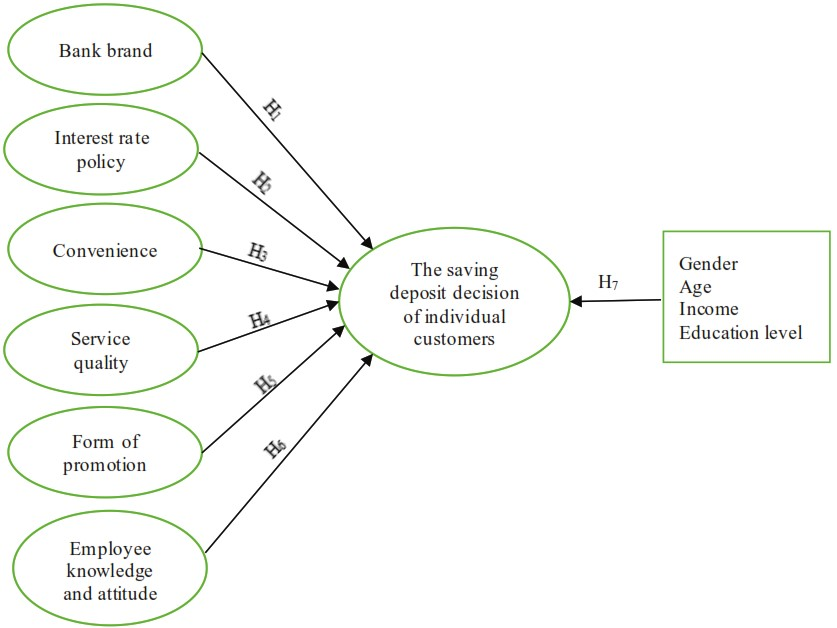

Nevertheless, as business entities with financial products and respective customers, banks still have to compete to not lose customers. One of the ways to `acquire new customers` is by `conducting a marketing campaign`, in this dataset based on `customers demographic` and `Employee Knowledge`.

## **B. Problem Statement**

`Marketing` plays an increasingly important role, it has become one of the `factors` that directly `influence` the customer’s deposit decision. Promotions `contribute` to the customer’s decisions because if the bank puts out impressive promotions, creating benefits for customers, it will `attract` customers attention.

The bank wants to analyze the `effectiveness` of its marketing campaign for a term deposit subscription to determine whether the campaign was successful or not.

## **C. Goals**

To identify the `factors` that `influence` the customer's decision and to build a `classification model` that can `reduce the cost` of marketing.
* Understand the `characteristics of customers` who subscribed to the term deposit and those who did not.
* Determine which marketing campaign `channels` and `season` were the most effective in attracting customers.
* Develop `insights and recommendations` for improving future marketing campaigns.

## **D. Analytic Approach**

The analytics approach could involve using `descriptive statistics and data visualization` techniques to explore the data and `identify trends and patterns`. We could also use machine learning techniques such as classification to build `predictive models` that can help us understand which `factors` are most `important` in `predicting` whether a customer will make a `deposit`.
> * Data Cleaning: Check for missing values, duplicate rows, and anomalies in the data.
> * Data Preprocessing: Check for outlier, create new features from existing variables that may help in modelling, remove redundant feature, and apply feature selection.
> * Model Building: Build predictive models to identify the factors that influence the term deposit subscription and to predict the likelihood of a customer subscribing to the term deposit.
> * Model Evaluation: Evaluate the performance of the models using appropriate evaluation metrics.
> * Insights and Recommendations: Based on the analysis, develop insights and recommendations for improving future marketing campaigns.

## **E. Evaluation Metrics**

***Confusion Matrix***


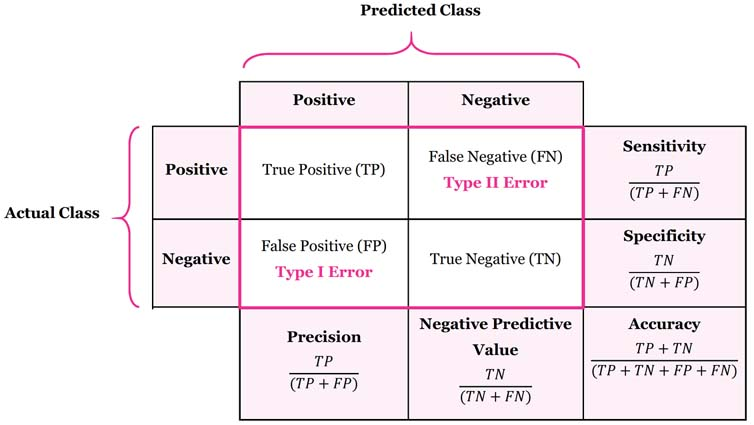

> * Recall (Sensitivity): The proportion of `true positive predictions` out of all `actual positive` cases. In other words, recall measures how good the classifier is at `finding all` the `positive instances (subscribe)`.
    * The `lower the recall`, the `higher` the `loss` of `potential customers`.

> * Specificity: The proportion of `true negative predictions` out of all `actual negative` cases. In other words, specificity measures how good the classifier is at `finding all` the `negative instances (not subscribe)`.
    * The `higher the specificity`, the `lower the marketing costs`, especially for `non-potential customers`.

> * ROC AUC Score: The area under the receiver operating characteristic curve, which measures the ability of the `model` to `distinguish` between positive (subscribe) and negative (not subscribe) cases with ROC-AUC above 70%

## **F. Libraries and Data**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import phik
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score, f1_score, balanced_accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, KFold, StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats
from feature_engine.discretisation import EqualWidthDiscretiser
import pickle

# set style of chart
plt.style.use('seaborn-white')

# set the max columns to none
pd.set_option('display.max_columns', None)

In [10]:
# from feature-engine
#from feature_engine.imputation import MeanMedianImputer, CategoricalImputer, ArbitraryNumberImputer, RandomSampleImputer
from feature_engine.selection import DropConstantFeatures, SmartCorrelatedSelection, DropDuplicateFeatures, RecursiveFeatureElimination
#from feature_engine.outliers import Winsorizer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder, OneHotEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser

In [11]:
# optbinning
#from optbinning import BinningProcess
#from optbinning import Scorecard
from optbinning.scorecard import plot_auc_roc, plot_ks, plot_cap
from optbinning import OptimalBinning

In [12]:
df = pd.read_csv("D:/Documents/AI_and_Embedded_Systems/AI/Courses/Purwadhika/Module_3_Machine_Learning/Online_Learning/Capstone/data_bank_marketing_campaign.csv")

In [13]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [14]:
df['deposit'] = np.where(df['deposit'] == 'yes',
                       1,
                       0)

Feature Description

* age: (numeric)
* job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')
* balance: Balance of the individual.
* contact: contact communication type (categorical: 'cellular','telephone','unknown')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted))
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* deposit : as the client subscribed a term deposit? (binary: 1,0)

# **02. Data Cleaning and Preparation**

## **A. Train-Test Split**

To avoid data leakage from training data to test data, we only fit in training data

In [15]:
X = df.drop('deposit', axis=1)
y = df['deposit']

In [16]:
y.value_counts()

0    4081
1    3732
Name: deposit, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44, stratify=y)

In [18]:
y_train.value_counts()/len(y_train)

0    0.522399
1    0.477601
Name: deposit, dtype: float64

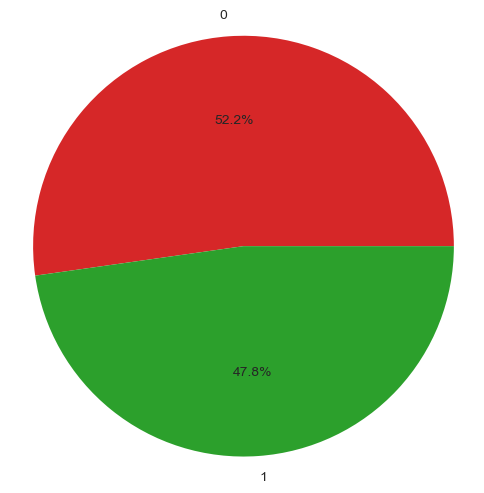

In [19]:
plt.figure(figsize=(6,6),dpi=100)
plt.pie(x=y_train.value_counts(),
        labels=y_train.value_counts().index,
        colors=['tab:red','tab:green'],
        autopct='%.1f%%')
plt.axis('equal');

There are 52.2% of No-subs customers and 47.8% of Subs customers, if the marketing campaign uses random calls

## **B. Missing Value Handling**

In [20]:
X_train.isnull().mean()

age         0.0
job         0.0
balance     0.0
housing     0.0
loan        0.0
contact     0.0
month       0.0
campaign    0.0
pdays       0.0
poutcome    0.0
dtype: float64

In [21]:
X_test.isnull().mean()

age         0.0
job         0.0
balance     0.0
housing     0.0
loan        0.0
contact     0.0
month       0.0
campaign    0.0
pdays       0.0
poutcome    0.0
dtype: float64

There are no columns with missing value

## **C. Data Consistency and Anomalies**

### Grouping Common Label

In [22]:
#check data consistency
for col in X_train.select_dtypes(exclude=np.number).columns:
    print(f'nilai unik dari {col} :')
    print(f'{X_train[col].unique()}')
    print('=='*50)

nilai unik dari job :
['retired' 'housemaid' 'entrepreneur' 'management' 'self-employed'
 'student' 'admin.' 'services' 'blue-collar' 'technician' 'unemployed'
 'unknown']
nilai unik dari housing :
['no' 'yes']
nilai unik dari loan :
['no' 'yes']
nilai unik dari contact :
['cellular' 'unknown' 'telephone']
nilai unik dari month :
['may' 'oct' 'aug' 'apr' 'nov' 'jan' 'jun' 'feb' 'mar' 'dec' 'jul' 'sep']
nilai unik dari poutcome :
['success' 'failure' 'unknown' 'other']


In [23]:
def group_label(data):
    # JOB
    # replace 'admin.' to 'admin'
    data['job'] = np.where(data['job'] == 'admin.', 
                          'admin', 
                          data['job'])
    
    # POUTCOME
    # replace 'other' to 'unknown'
    data['poutcome'] = np.where(data['poutcome'] == 'other', 
                                'unknown', 
                                data['poutcome'])
    
    return data

In [24]:
X_train = group_label(X_train)
X_test = group_label(X_test)

Grouping some common labels:

> * admin. to admin
> * other to unknown

In [25]:
X_train.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
5949,75,retired,6027,no,no,cellular,may,1,179,success
3900,62,retired,1515,yes,no,cellular,oct,1,187,failure
4622,36,housemaid,7296,yes,no,cellular,aug,6,-1,unknown
4971,41,entrepreneur,221,yes,no,unknown,may,2,-1,unknown
2182,37,management,0,yes,no,cellular,may,6,-1,unknown


### **Drop duplicate data**

drop for train data, test data not dropped because not used for training the model

In [26]:
X_train.duplicated().sum()

4

In [27]:
# drop duplicate in y (target)
y_train.drop(X_train[X_train.duplicated()].index, inplace=True)

In [28]:
# drop duplicate in X (predictor)
X_train.drop_duplicates(inplace=True)

4 duplicate rows will be drop

In [29]:
#reset index train and test set
X_train.reset_index(drop='true', inplace=True)
y_train.reset_index(drop='true', inplace=True)

X_test.reset_index(drop='true', inplace=True)
y_test.reset_index(drop='true', inplace=True)

# **03. Data Pre-processing (Feature Engineering) for Modelling**

🔑**Note:** data preprocessing should be done over the `training set`, and `then propagated to the test set`. This means that the `mean / median` to be used to `fill missing values both in train and test set`, 

> should be `extracted` from the `train set only`. And this is to avoid overfitting.

In [38]:
X_train_ori = X_train.copy()
X_test_ori = X_test.copy()

In [39]:
num_list = X_train.select_dtypes(include=np.number).columns.to_list()
cat_list = X_train.select_dtypes(exclude=np.number).columns.to_list()

## **A. Outliers Handling**

### **Equal Frequency Discretization**

Equal frequency discretisation divides the scope of possible values of the variable into N bins, 

> where **each bin carries the same amount of observations**. 

> This is **particularly useful for skewed variables** as it **spreads the observations over the different bins equally**. 

We find the interval boundaries by determining the quantiles.

Equal frequency discretisation 

> **using quantiles consists of dividing the continuous variable into N quantiles**, N to be defined by the user.

Equal frequency binning is straightforward to implement and by **spreading the values of the observations more evenly it may help boost the algorithm's performance**.

**Advantages**


* Handles outliers
* Good to combine with categorical encodings
* Improve value spread

**Limitation**

* Arbitrary binning may also disrupt the relationship with the target

In [44]:
# Works only with numerical variable
eq_freq_disc = EqualFrequencyDiscretiser(q=5, # number of bins (5 berarti di bin tiap 20th percentile)
                                 variables=num_list,
                                 return_object=False) # True: set transformed data type as str

eq_freq_disc.fit(X_train)

EqualFrequencyDiscretiser(q=5,
                          variables=['age', 'balance', 'campaign', 'pdays'])

In [45]:
# in the binner dict, we can see the limits of the intervals. Note
# that the intervals have different widths

eq_freq_disc.binner_dict_

{'age': [-inf, 31.0, 36.0, 42.0, 52.0, inf],
 'balance': [-inf, 67.0, 342.0, 860.4000000000005, 2157.2, inf],
 'campaign': [-inf, 2.0, 3.0, inf],
 'pdays': [-inf, 95.0, inf]}

In [46]:
# transform train and text
X_train = eq_freq_disc.transform(X_train)
X_test = eq_freq_disc.transform(X_test)

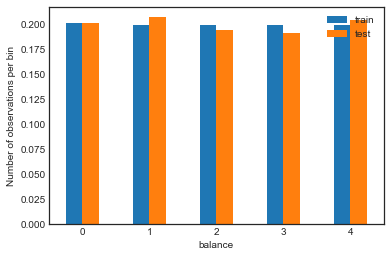

In [47]:
#"""
t1 = X_train.groupby(['balance'])['balance'].count() / len(X_train)
t2 = X_test.groupby(['balance'])['balance'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin');
#"""

## **B. Categorical Encoding**

### **Rare Label**

**Infrequent** labels are so few, that it is **hard to derive reliable information** from them. But more importantly, **infrequent labels tend to appear only on train set or only on the test set**:

* If only on the train set, they may cause over-fitting
* If only on the test set, our machine learning model will not know how to score them

**Grouping** infrequent labels or categories under a new category **called 'Rare' or 'Other' is the common practice** in machine learning for business.

* Grouping categories into rare for variables that show **low cardinality may or may not improve model performance**, **however**, we tend to re-group them into a new category to smooth model deployment.

* Grouping categories into rare for variables with **high cardinality**, **tends to improve model performance** as well.

In [48]:
# Rare value encoder
rare_encoder = RareLabelEncoder(
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=5, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=cat_list # variables to re-group
)  

In [49]:
rare_encoder.fit(X_train)

The number of unique categories for variable housing is less than that indicated in n_categories. Thus, all categories will be considered frequent
The number of unique categories for variable loan is less than that indicated in n_categories. Thus, all categories will be considered frequent
The number of unique categories for variable contact is less than that indicated in n_categories. Thus, all categories will be considered frequent
The number of unique categories for variable poutcome is less than that indicated in n_categories. Thus, all categories will be considered frequent


RareLabelEncoder(n_categories=5,
                 variables=['job', 'housing', 'loan', 'contact', 'month',
                            'poutcome'])

Note how the encoder is warning us that **the variable contains less than 4 categories**, and thus,
> **categories will not be regrouped under Rare**, **even if the percentage of observations is less than 0.1**.

In [50]:
# the encoder_dict_ is a dictionary of variable: frequent labels pair
rare_encoder.encoder_dict_

{'job': Index(['management', 'blue-collar', 'technician', 'admin', 'services',
        'retired'],
       dtype='object'),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'month': Index(['may', 'aug', 'jul', 'jun', 'apr', 'nov', 'feb'], dtype='object'),
 'poutcome': array(['success', 'failure', 'unknown'], dtype=object)}

In [51]:
X_train = rare_encoder.transform(X_train)
X_test = rare_encoder.transform(X_test)

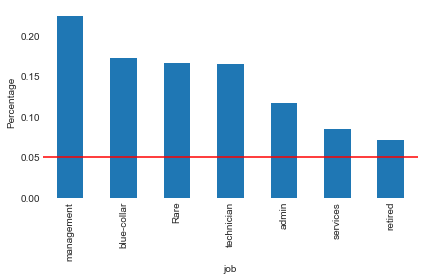

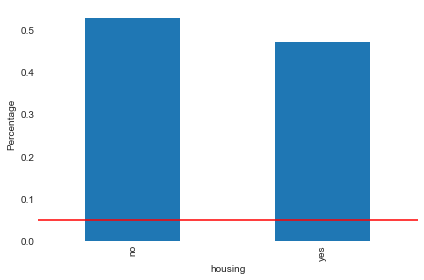

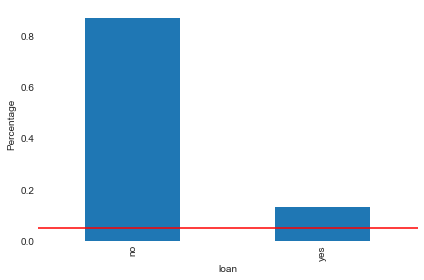

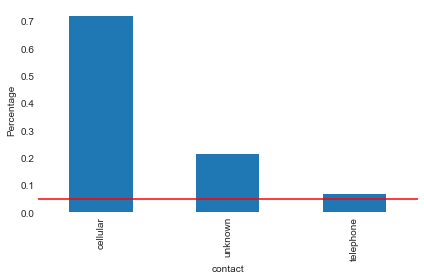

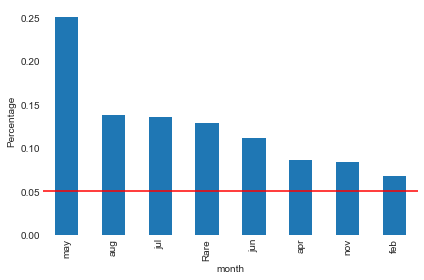

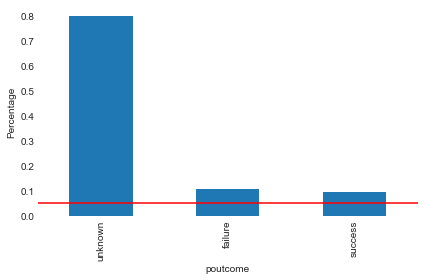

In [52]:
# High Cardinality
for col in cat_list:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage')
    plt.tight_layout()
    # remove border
    sns.despine(bottom=True, left=True)
    plt.show()

### **Ordered Label Encoding**

**Ordering** the categories **according to the target means** assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, 

> but this numbering is informed by the mean of the target for each category.

**Advantages**
* Straightforward to implement
* Does not expand the feature space
* Creates monotonic relationship between categories
and target

**Limitations**
* May lead to over-fitting

In [53]:
ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method='ordered',
    variables=cat_list
    )

In [54]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['job', 'housing', 'loan', 'contact', 'month',
                          'poutcome'])

In [55]:
# in the encoder dict we can observe each of the top categories
# selected for each of the variables

ordinal_enc.encoder_dict_

{'job': {'blue-collar': 0,
  'services': 1,
  'technician': 2,
  'admin': 3,
  'management': 4,
  'Rare': 5,
  'retired': 6},
 'housing': {'yes': 0, 'no': 1},
 'loan': {'yes': 0, 'no': 1},
 'contact': {'unknown': 0, 'telephone': 1, 'cellular': 2},
 'month': {'may': 0,
  'jul': 1,
  'nov': 2,
  'jun': 3,
  'aug': 4,
  'feb': 5,
  'apr': 6,
  'Rare': 7},
 'poutcome': {'unknown': 0, 'failure': 1, 'success': 2}}

In [56]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# let's explore the result
X_train.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
0,4,6,4,1,1,2,0,0,1,2
1,4,6,3,0,1,2,7,0,1,1
2,1,5,4,0,1,2,4,2,0,0
3,2,5,1,0,1,0,0,0,0,0
4,2,4,0,0,1,2,0,2,0,0


In [57]:
test = pd.concat([X_test,pd.DataFrame(y_test, columns=['deposit'])], axis=1)

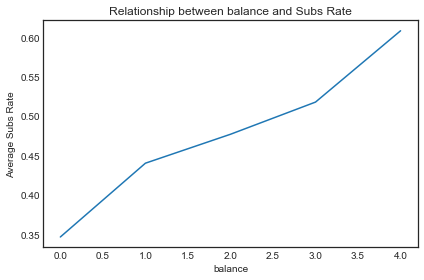

In [58]:
fig = plt.figure()
fig = test.groupby(['balance'])['deposit'].mean().plot()
fig.set_title('Relationship between {} and Subs Rate'.format('balance'))
fig.set_ylabel('Average Subs Rate')
plt.tight_layout();

If the **argument variables is left to None**, 

> then the encoder will automatically identify all categorical variables.

**The encoder will not encode numerical variables**. So if some of your numerical variables are in fact categories, you will need to **re-cast them as object** before using the encoder.

Finally, **if there is a label in the test set** that was **not present in the train set**, the encoder will through and error, to alert you of this behaviour.

## **C. Model Benchmark**

In [59]:
logreg = LogisticRegression(random_state=44, max_iter=1000)
tree = DecisionTreeClassifier(random_state=44)
rf = RandomForestClassifier(random_state=44)
lgbm = LGBMClassifier(random_state=44)

In [60]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
model = [logreg, tree, rf, lgbm]

cv_mean_roc_auc = []
cv_std_roc_auc = []

for i in model:

    model_cv = cross_val_score(
        estimator=i,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring='roc_auc'
        )

    #print(model_cv,i)
    cv_mean_roc_auc.append(model_cv.mean())
    cv_std_roc_auc.append(model_cv.std())

In [61]:
train_benchmark_roc_auc  = pd.DataFrame({
    'models':['Logreg','Decision Tree','Random Forest','LGBM'],
    'mean_roc_auc':cv_mean_roc_auc,
    'std_roc_auc':cv_std_roc_auc
})

In [62]:
print('Train Benchmark Performance Score')
train_benchmark_roc_auc

Train Benchmark Performance Score


,models,mean_roc_auc,std_roc_auc
0,Logreg,0.739259,0.013458
1,Decision Tree,0.638560,0.014443
2,Random Forest,0.716083,0.006223
3,LGBM,0.749955,0.012665


Light Gradient Boosting is choosed because of highest ROC-AUC

## **D. Feature Selection**

SmartCorrelatedSelection() works only with numerical variables. Categorical variables will need to be encoded to numerical or will be excluded from the analysis.

No need to scaling for feature selection below.

In [63]:
# we stack all the selection methods inside a pipeline
pipe = Pipeline([('constant', DropConstantFeatures(tol=0.99)), # drop features that has > 0.99 of dominant value (value count)
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(threshold=0.7, # >0.7 feature corr(both + and -) will be removed
                                                         method='spearman', 
                                                         #selection_method='variance'
                                                         selection_method='model_performance',
                                                         #estimator=LGBMClassifier(random_state=44, is_unbalance=True),
                                                         estimator=LGBMClassifier(random_state=44),
                                                         scoring='roc_auc',
                                                         cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
                                                        )
                                                        )
                ])
pipe.fit(X_train, y_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.99)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlated',
                 SmartCorrelatedSelection(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                          estimator=LGBMClassifier(random_state=44),
                                          method='spearman',
                                          selection_method='model_performance',
                                          threshold=0.7))])

### **Remove Constant**

In [64]:
# total constant and quasi-constant features to drop
len(pipe.named_steps['constant'].features_to_drop_)

0

In [65]:
X_train[pipe.named_steps['constant'].features_to_drop_].columns

Index([], dtype='object')

### **Remove Duplicated**

In [66]:
# total duplicated features to drop
len(pipe.named_steps['duplicated'].features_to_drop_)

0

In [67]:
X_train[pipe.named_steps['duplicated'].features_to_drop_].columns

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


Index([], dtype='object')

### **Remove Multicollinearity**

Two features were found, having a strong correlation (r>0.7), namely pdays and poutcome. Then the one with the higher variance will be selected.

In [68]:
# total of correlated features to drop
len(pipe.named_steps['correlated'].features_to_drop_)

1

In [69]:
# list of correlated features group
pipe.named_steps['correlated'].correlated_feature_sets_

[{'pdays', 'poutcome'}]

Multicollinearity found

In [70]:
# remove features in train and test set
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)
#X_train_ori = pipe.transform(X_train_ori)
#X_test_ori = pipe.transform(X_test_ori)

X_train.shape, X_test.shape

((5465, 9), (2344, 9))

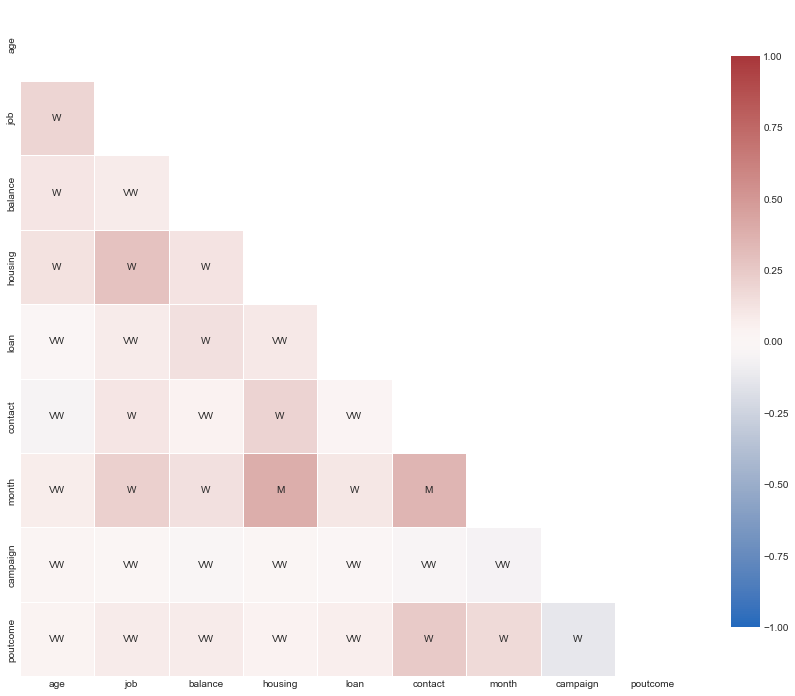

In [71]:
correlation_plot(X_train)

We minimize the effect of multicollinearity

### **Boruta SHAP**

8 features were selected to be used for modeling with the condition that Z-score > shadow feature (random number)
* contact
* age
* Campaigns
* Job
* balance
* Housing
* month
* poutcome

In [72]:
from BorutaShap import BorutaShap

In [73]:
# if classification is False it is a Regression problem
Feature_Selector = BorutaShap(#model=LGBMClassifier(random_state=44, is_unbalance=True),
                              model=LGBMClassifier(random_state=44),
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X_train, y=y_train, n_trials=100, #n_trials=150,
                     sample=False,
                     train_or_test = 'test', normalize=True,
                     verbose=True, 
                     #stratify=y_train
                    )

  0%|          | 0/100 [00:00<?, ?it/s]

8 attributes confirmed important: ['job', 'month', 'balance', 'contact', 'housing', 'poutcome', 'campaign', 'age']
1 attributes confirmed unimportant: ['loan']
0 tentative attributes remains: []


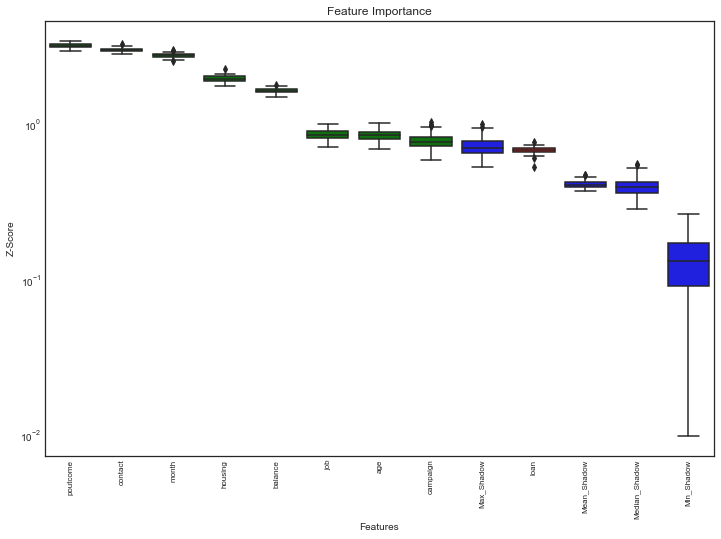

In [74]:
# Returns Boxplot of features
Feature_Selector.plot(which_features='all')

Feature selected is based on Z-score compared to shadow feature.
    
* If lower than shadow feature z-score, it will be likely to unimportant

In [75]:
# Return a subset of the original data with the selected features
subset = Feature_Selector.Subset()
subset.columns.tolist()

['job',
 'month',
 'balance',
 'contact',
 'housing',
 'poutcome',
 'campaign',
 'age']

In [76]:
# for pipeline to select important feature only based on your feature selection
#from mlxtend.feature_selection import ColumnSelector

#col_selector = ColumnSelector(cols=subset.columns.tolist())

In [77]:
# for model explainer SHAP, original data before scaling with important feature
X_train_shap = X_train[subset.columns]
X_test_shap = X_test[subset.columns]

# select important feature for modelling
X_train_arr = np.array(X_train[subset.columns])
X_test_arr = np.array(X_test[subset.columns])

In [78]:
X_train_arr.shape[1]

8

# **04. Modelling**

In [79]:
# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=44)

skf = StratifiedKFold(n_splits=5, random_state=44, shuffle=True)

In [80]:
#imba_pipeline = make_pipeline(SMOTEENN(random_state=42), 
#                              xgb.XGBClassifier(random_state=44, use_label_encoder=False, eval_metric='logloss'))

## **A. Hyperparameter Tuning**

The LGBM model will undergo hyperparameter tuning:
* n_estimators: number of boosting iterations
* max_depth: limit the max depth for tree model. This is used to deal with over-fitting when data is small. Tree still grows leaf-wise
* num_leaves: max number of leaves in one tree
* reg_alpha: L1 regularization to reduce overfitting
* path_smooth: helps prevent overfitting on leaves with few samples
* subsample: LightGBM will randomly select a subset of features on each iteration. For example, if you set it to 0.8, LightGBM will select 80% of features before training each tree (can be used to speed up training and deal with overfitting)

In [81]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [82]:
###### the objective function takes the hyperparameter space
# as input

def objective(trial):
    
    # Search params grid
    lgbm_n_estimators = trial.suggest_int("lgbm_n_estimators", 100, 2500)
    lgbm_max_depth = trial.suggest_int("lgbm_max_depth", 5, 10)
    lgbm_num_leaves = trial.suggest_int("lgbm_num_leaves", 31, 300)
    lgbm_reg_alpha = trial.suggest_int("lgbm_reg_alpha", 1, 50)
    lgbm_path_smooth = trial.suggest_int("lgbm_path_smooth", 1, 30)
    lgbm_subsample = trial.suggest_float("lgbm_subsample", 0.1, 1.0)
    
    model = LGBMClassifier(random_state=44,
                          n_estimators=lgbm_n_estimators,
                          max_depth=lgbm_max_depth, num_leaves=lgbm_num_leaves,
                          reg_alpha=lgbm_reg_alpha,
                          path_smooth=lgbm_path_smooth,
                          subsample=lgbm_subsample
                          )
    """
    The purpose of using cross-validation is to make you more confident to the model trained on the training set. 
    Without cross-validation, your model may perform pretty well on the training set, 
    but the performance decreases when applied to the testing set.
    """
    score = cross_val_score(model, X_train_arr, y_train, cv=skf, scoring='roc_auc')
    mean_score = score.mean()
    return mean_score

In [83]:
#np.random.seed(0)
study = optuna.create_study(
    direction="maximize",
    #sampler=optuna.samplers.CmaEsSampler(),
    sampler=optuna.samplers.TPESampler()
)

study.optimize(objective, n_trials=100)

In [84]:
study.best_params

{'lgbm_n_estimators': 1997,
 'lgbm_max_depth': 10,
 'lgbm_num_leaves': 42,
 'lgbm_reg_alpha': 4,
 'lgbm_path_smooth': 24,
 'lgbm_subsample': 0.7700634041122911}

In [85]:
study.best_value

0.7637622833058129

In [86]:
results = study.trials_dataframe()

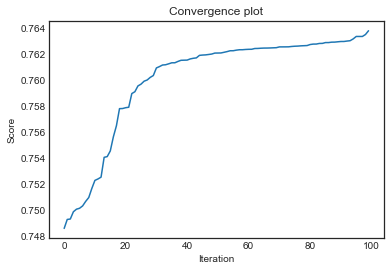

In [87]:
results['value'].sort_values().reset_index(drop=True).plot()
plt.title('Convergence plot')
plt.xlabel('Iteration')
plt.ylabel('Score');

In [88]:
#optuna.visualization.matplotlib.plot_param_importances(study)
#plt.style.use('seaborn-white');

### **Best Model**

In [89]:
'''
 TPE ROC AUC
 Equal Freq Dist
{'lgbm_n_estimators': 184,
 'lgbm_max_depth': 10,
 'lgbm_num_leaves': 231,
 'lgbm_reg_alpha': 5,
 'lgbm_path_smooth': 26,
 'lgbm_subsample': 0.7974956866591439}
'''

"\n TPE ROC AUC\n Equal Freq Dist\n{'lgbm_n_estimators': 184,\n 'lgbm_max_depth': 10,\n 'lgbm_num_leaves': 231,\n 'lgbm_reg_alpha': 5,\n 'lgbm_path_smooth': 26,\n 'lgbm_subsample': 0.7974956866591439}\n"

In [90]:
best_model = LGBMClassifier(random_state=44,
                            n_estimators=184,
                            max_depth=10,
                            num_leaves=231,
                            reg_alpha=7,
                            path_smooth=26,
                            subsample=0.7974956866591439
                           )
best_model.fit(X_train_arr,y_train)

LGBMClassifier(max_depth=10, n_estimators=184, num_leaves=231, path_smooth=26,
               random_state=44, reg_alpha=7, subsample=0.7974956866591439)

In [91]:
best_model.classes_

array([0, 1])

## **B. Model Evaluation** 📍

Accuracy paradox:
* Any classifier dealing with **imbalanced** classes has to confront the issue of the accuracy paradox
* **Imbalanced** classes will always result in a distorted accuracy reflecting better performance than what is truly warranted

This means we shouldn't solely rely on accuracy as a metric

**F1 Score vs Balanced Accuracy**

So you might be wondering what’s the difference between Balanced Accuracy and the F1-Score since both are used for imbalanced classification. So, let’s consider it.

    F1 = 2 * ([precision * recall] / [precision + recall])
    Balanced Accuracy = (specificity + recall) / 2

* F1 keeps the balance between precision and recall

* F1 score doesn’t care about how many true negatives are being classified. When working on an imbalanced dataset that demands attention on the negatives, 
Balanced Accuracy does better than F1.
* In cases where positives are as important as negatives, balanced accuracy is a better metric for this than F1.
* F1 is a great scoring metric for imbalanced data when more attention is needed on the positives. 




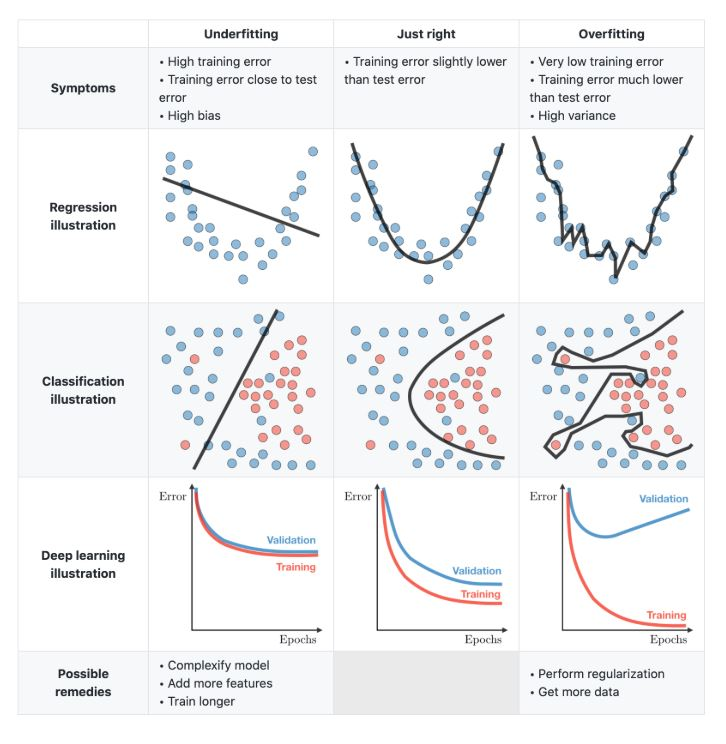

In [92]:
y_pred_test = best_model.predict(X_test_arr)
y_pred_proba_test = best_model.predict_proba(X_test_arr) # ambil proba untuk semua label
#y_pred_proba_test = grid_log_model.predict_proba(X_test_scaled)[:,1] # ambil proba pada semua baris untuk label di index 1 (Label 1)

In [93]:
y_pred_train = best_model.predict(X_train_arr)
y_pred_proba_train = best_model.predict_proba(X_train_arr) # ambil proba untuk semua label

In [94]:
y_test.shape, y_pred_proba_test.shape

((2344,), (2344, 2))

### **Threshold Adjustment**

In [95]:
# save y_pred_test in different threshold (default 0.5)
y_pred_test_threshold=[]
for i in np.arange(0.05, 1.0, 0.05):
    y_pred_test_threshold.append((y_pred_proba_test[:,1] > i).astype(int))

In [96]:
# save y_pred_test in different threshold (default 0.5)
y_pred_train_threshold=[]
for i in np.arange(0.05, 1.0, 0.05):
    y_pred_train_threshold.append((y_pred_proba_train[:,1] > i).astype(int))

In [97]:
# TRAIN
thres_ = 0
for i in range(0,19):
    thres_ +=0.05 
    print(f'----------------------------------Train Threshold: {np.round(thres_,2)}----------------------------------')
    print(classification_report(y_train,y_pred_train_threshold[i]))

----------------------------------Train Threshold: 0.05----------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2856
           1       0.48      1.00      0.65      2609

    accuracy                           0.48      5465
   macro avg       0.24      0.50      0.32      5465
weighted avg       0.23      0.48      0.31      5465

----------------------------------Train Threshold: 0.1----------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2856
           1       0.48      1.00      0.65      2609

    accuracy                           0.48      5465
   macro avg       0.24      0.50      0.32      5465
weighted avg       0.23      0.48      0.31      5465

----------------------------------Train Threshold: 0.15----------------------------------
              precision    recall  f1-score   support

           0       0.9

In [98]:
# TEST
thres_ = 0
for i in range(0,19):
    thres_ +=0.05 
    print(f'----------------------------------Test Threshold: {np.round(thres_,2)}----------------------------------')
    print(classification_report(y_test,y_pred_test_threshold[i]))

----------------------------------Test Threshold: 0.05----------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1224
           1       0.48      1.00      0.65      1120

    accuracy                           0.48      2344
   macro avg       0.24      0.50      0.32      2344
weighted avg       0.23      0.48      0.31      2344

----------------------------------Test Threshold: 0.1----------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1224
           1       0.48      1.00      0.65      1120

    accuracy                           0.48      2344
   macro avg       0.24      0.50      0.32      2344
weighted avg       0.23      0.48      0.31      2344

----------------------------------Test Threshold: 0.15----------------------------------
              precision    recall  f1-score   support

           0       0.88  

In [99]:
# because there is a chance that TPR-FRP will have multiple optimal threshold, 
# it is recommend to adjust threshold manually according to the business requirements
fpr_test, fpr_train, tpr_test, tpr_train, first_optimal_threshold_test, first_optimal_threshold_train = evaluation_binaryclass(
    y_train, y_test, y_pred_proba_train, y_pred_proba_test)

In [100]:
print(f'Optimal threshold Train: {first_optimal_threshold_train}')
print(f'Optimal threshold Test: {first_optimal_threshold_test}')

Optimal threshold Train: 0.45541544935579836
Optimal threshold Test: 0.4566027904875212


Threshold dengan selisih TPR dan FPR paling tinggi

In [101]:
# prediksi pada threshold optimum yang muncul pertama (first occurences)
y_pred_test_optimum_first = (y_pred_proba_test[:,1] > first_optimal_threshold_test).astype(int)
y_pred_train_optimum_first = (y_pred_proba_train[:,1] > first_optimal_threshold_train).astype(int)

# manual threshold adjustment
optimal_threshold_test = optimal_threshold_train = 0.455
y_pred_test_optimum = (y_pred_proba_test[:,1] > optimal_threshold_test).astype(int)
y_pred_train_optimum = (y_pred_proba_train[:,1] > optimal_threshold_train).astype(int)

In [102]:
# create prediction dataframe for test
prediction_df_test = X_test_shap.copy()
prediction_df_test['GOOD_FLAG'] = y_test
prediction_df_test['PRED_OPT_GOOD'] = y_pred_test_optimum
prediction_df_test['PRED_PROBA_GOOD'] = y_pred_proba_test[:,1]

In [103]:
# create prediction dataframe for train
prediction_df_train = X_train_shap.copy()
prediction_df_train['GOOD_FLAG'] = y_train
prediction_df_train['PRED_OPT_GOOD'] = y_pred_train_optimum
prediction_df_train['PRED_PROBA_GOOD'] = y_pred_proba_train[:,1]

### **Predict Proba Distribution**

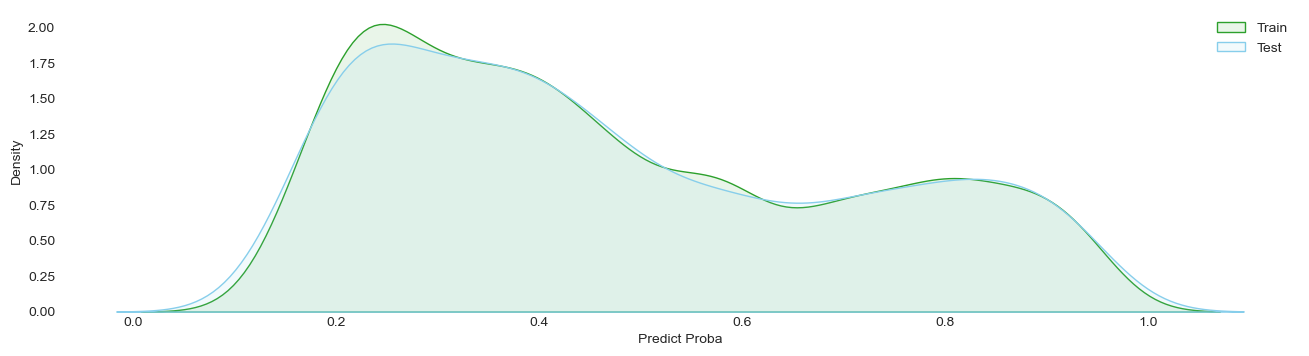

In [104]:
# Melihat distribusi train dan test
plt.figure(figsize=(16,4), dpi=100)
sns.kdeplot(y_pred_proba_train[:,1], label="Train", color='tab:green', alpha=0.1,linewidth=1, fill=True)
sns.kdeplot(y_pred_proba_test[:,1], label="Test", color='skyblue', alpha=0.1, linewidth=1, fill=True)
plt.xlabel('Predict Proba')
sns.despine(bottom=True, left=True)
plt.legend();

In [105]:
# perform mannwhitneyu test (non-parametric)
# The mannwhitneyu test is used to test whether or not or not a sample have same distribution (allow unequal size)
stat, p = stats.mannwhitneyu(y_pred_proba_train[:,1], y_pred_proba_test[:,1]) # digunakan mannwhitneyu karena tidak berdistribusi normal
print(f"p-value: {p}")

if p > 0.05: # pvalue -> probabilitas H0
    print('fail to reject (accept) H0, probably the same distribution\n')
else:
    print('reject H0, probably different distributions\n')

p-value: 0.8986553354021629
fail to reject (accept) H0, probably the same distribution



Distribusi predict proba antara train vs test sama

#### **Train Pred Proba**

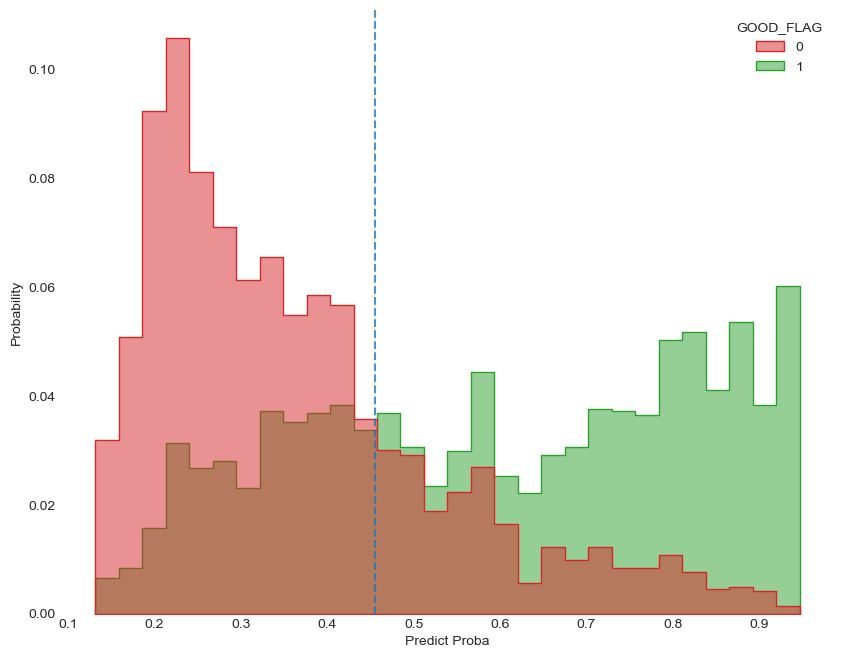

In [106]:
# Melihat distribusi train dan test
plt.figure(figsize=(10,8), dpi=100)
sns.histplot(data=prediction_df_train, x='PRED_PROBA_GOOD', hue='GOOD_FLAG', kde=False, stat='probability', bins=30, alpha=0.5, palette=['tab:red', 'tab:green'], common_norm=False, linewidth=1, element='step')
plt.axvline(optimal_threshold_train, color='tab:blue', ls='dashed', alpha=0.8)
sns.despine(bottom=True, left=True)
plt.xlabel('Predict Proba');

#### **Test Pred Proba**

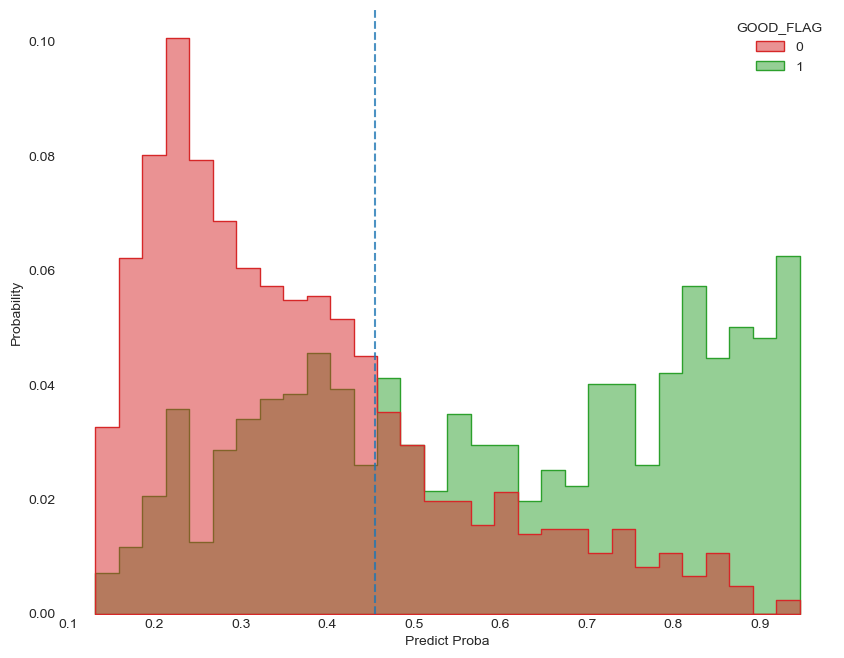

In [107]:
# Melihat distribusi predict proba test
plt.figure(figsize=(10,8), dpi=100)
sns.histplot(data=prediction_df_test, x='PRED_PROBA_GOOD', hue='GOOD_FLAG', kde=False, stat='probability', bins=30, alpha=0.5, palette=['tab:red', 'tab:green'], common_norm=False, linewidth=1, element='step')
plt.axvline(optimal_threshold_test, color='tab:blue', ls='dashed', alpha=0.8)
sns.despine(bottom=True, left=True)
plt.xlabel('Predict Proba');

### **ROC AUC** 📍

* ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. 

* Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease. 

* It works by ranking the probabilities of prediction of the positive class label and calculating the Area under the ROC Curve which is plotted between True Positive Rates and False Positive Rates for each threshold value

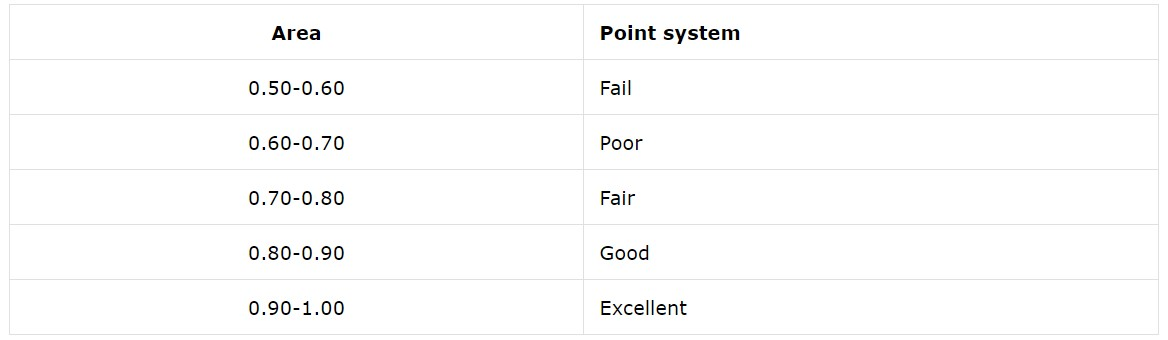

By these standards, a model with an AUC score below 0.7 would be considered poor and anything higher would be considered acceptable or better.

**Note: A “Good” AUC Score Varies by Industry**

[ROC AUC rule of thumb from Hosmer and Lemeshow ](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118548387)

**ROC:**

* True Positive Rate (Recall) = True Positives / (True Positives + False Negatives)

* False Positive Rate = False Positives / (False Positives + True Negatives)

* True Negative Rate (Specificity) = 1 - False Positive Rate

* FPR and TPR (ROC metrics) measure the ability to distinguish between the classes.



I use ROC-AUC score as a benchmark metrics:
* AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.





There is no significant different between Train and Test ROC-AUC, so the model is not overfit

* Train ROC-AUC: 79%
* Test ROC-AUC: 77%

#### **Train ROC AUC**

In [108]:
roc_score_train = roc_auc_score(y_train, y_pred_proba_train[:,1])

In [109]:
print(f"Train ROC = {roc_score_train:.3f}")

Train ROC = 0.790


In [110]:
CI_neg, CI_pos = ConfidenceInterval(roc_score_train, X_train_shap.shape[0])

In [111]:
print(f"Confidence Interval ROC = [{CI_neg:.3f} , {CI_pos:.3f}]")

Confidence Interval ROC = [0.780 , 0.801]


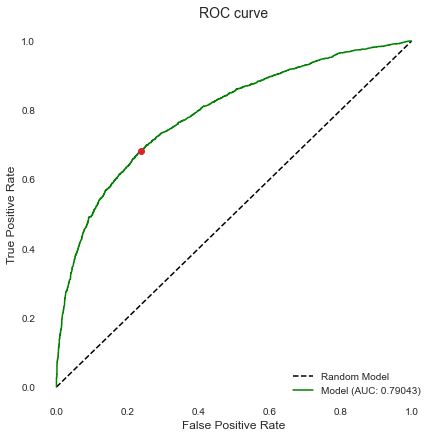

In [112]:
#TRAIN
plt.figure(figsize=(7,7))
plot_auc_roc(np.array(y_train), y_pred_proba_train[:,1])
plt.plot(fpr_train[np.argmax(np.abs(tpr_train - fpr_train))], tpr_train[np.argmax(np.abs(tpr_train - fpr_train))], marker='o', color='tab:red')
sns.despine(bottom=True, left=True);

#### **Test ROC AUC**

In [113]:
roc_score_test = roc_auc_score(y_test, y_pred_proba_test[:,1])

In [114]:
print(f"Test ROC = {roc_score_test:.3f}")

Test ROC = 0.772


In [115]:
CI_neg, CI_pos = ConfidenceInterval(roc_score_test, X_test_shap.shape[0])

In [116]:
print(f"Confidence Interval ROC = [{CI_neg:.3f} , {CI_pos:.3f}]")

Confidence Interval ROC = [0.755 , 0.789]


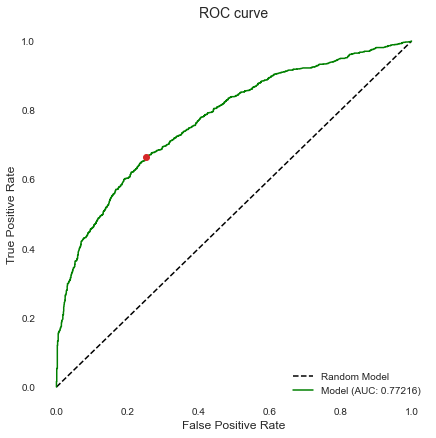

In [117]:
#TEST
plt.figure(figsize=(7,7))
#plot_auc_roc(np.array(y_test), y_pred_proba_test[:,1])
plot_auc_roc(np.array(y_test), y_pred_proba_test[:,1])
plt.plot(fpr_test[np.argmax(np.abs(tpr_test - fpr_test))], tpr_test[np.argmax(np.abs(tpr_test - fpr_test))], marker='o', color='tab:red')
sns.despine(bottom=True, left=True);

### **Business Impact - Confusion Matrix**

***Confusion Matrix***


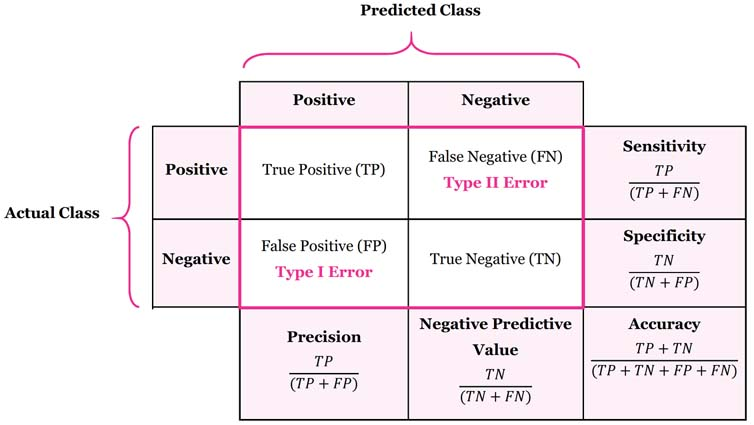

There is no significant different between train and test metrics, so this model is not overfit

* Based on the model, we might lose 33% potential users but we can filter customers who unlikely to subscribe up to 74%
    * In example, if we have 100 customers, the model can reject the 74 customers who unlikely to subscribe
* According to this [dataset](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset), average marketing cost each person is 94 EUR
    > * If we use random call, the marketing cost will be `all_customers*94` = `2344*94` = `220366 EUR` 
    > * Of the 100 customers who are marketing targets, only 48 (48%) customers have the potential to subscribe
    
    > * If we use the model, the marketing cost will be `filtered_user*94` = `1061*94` = `99734 EUR`. In others word, the marketing cost `reduced by 54.7%` with 70% precision to correctly predict potential customers
    > * The model recommends 100 customers as marketing targets, then 70 people have the potential to subscribe
* If we use the model, we can `improve` subscribe ratio from `48% (random call) to 70%` with `reduced cost` up to `54.7%`

#### **Train**

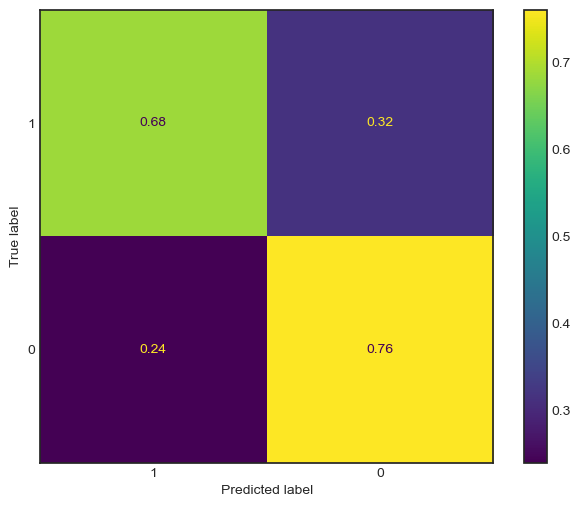

In [118]:
fig, ax=plt.subplots(figsize=(8,6), dpi=100)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_optimum, ax=ax, labels=[1,0], normalize='true');

In [119]:
print(f'----------------------------------Threshold: {np.round(optimal_threshold_train, 3)}----------------------------------')
print(classification_report(y_train,y_pred_train_optimum))

----------------------------------Threshold: 0.455----------------------------------
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      2856
           1       0.72      0.68      0.70      2609

    accuracy                           0.72      5465
   macro avg       0.72      0.72      0.72      5465
weighted avg       0.72      0.72      0.72      5465



#### **Test**

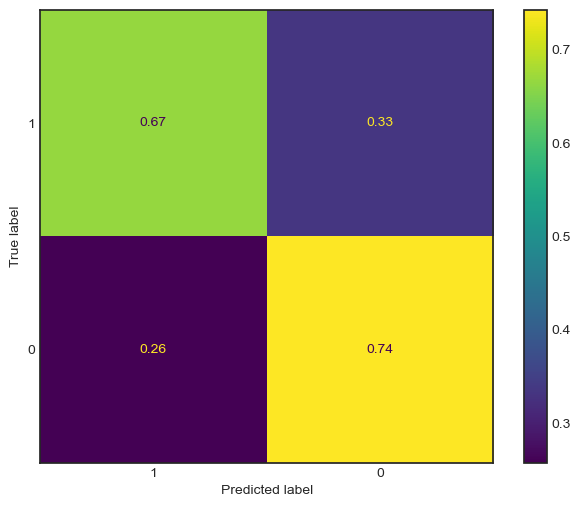

In [120]:
fig, ax=plt.subplots(figsize=(8,6), dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_optimum, ax=ax, labels=[1,0], normalize='true');

In [121]:
print(f'----------------------------------Threshold: {np.round(optimal_threshold_test, 3)}----------------------------------')
print(classification_report(y_test,y_pred_test_optimum))

----------------------------------Threshold: 0.455----------------------------------
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1224
           1       0.70      0.67      0.68      1120

    accuracy                           0.71      2344
   macro avg       0.71      0.70      0.70      2344
weighted avg       0.71      0.71      0.71      2344



## **C. Save and Model Pipeline** ✅

If the data distribution are change, need to re-train the model.

Feature Selection is removed in production (deployed) to reduce prediction time and avoid inconsistency feature from development model.

In [122]:
def date_preparation(dataframe):
    predefined_features = ['month','campaign','age','housing','job','contact','poutcome','balance']
    dataframe = dataframe[predefined_features]
    dataframe = dataframe.dropna()
    return dataframe

In [123]:
np.random.seed(0)
# we stack all the selection methods inside a pipeline
lightgbm_pipe = Pipeline([
    ('datapreparation', FunctionTransformer(date_preparation)),
    ('eqfreq_bins', EqualFrequencyDiscretiser(q=5, variables=['age', 'balance', 'campaign'], return_object=False)),
    ('rarelabel_enc', RareLabelEncoder(tol=0.05, n_categories=5, variables=['job', 'housing', 'contact', 'month', 'poutcome'])),
    ('ordinal_enc', OrdinalEncoder(encoding_method="ordered", variables=['job', 'housing', 'contact', 'month', 'poutcome'])),
    ('lightgbm', LGBMClassifier(random_state=44,
                                n_estimators=184,
                                max_depth=10,
                                num_leaves=231,
                                reg_alpha=7,
                                path_smooth=26,
                                subsample=0.7974956866591439
                               )
    )
                ])
lightgbm_pipe.fit(X_train_ori, y_train)

Pipeline(steps=[('datapreparation',
                 FunctionTransformer(func=<function date_preparation at 0x0000024FB091C040>)),
                ('eqfreq_bins',
                 EqualFrequencyDiscretiser(q=5,
                                           variables=['age', 'balance',
                                                      'campaign'])),
                ('rarelabel_enc',
                 RareLabelEncoder(n_categories=5,
                                  variables=['job', 'housing', 'contact',
                                             'month', 'poutcome'])),
                ('ordinal_enc',
                 OrdinalEncoder(variables=['job', 'housing', 'contact', 'month',
                                           'poutcome'])),
                ('lightgbm',
                 LGBMClassifier(max_depth=10, n_estimators=184, num_leaves=231,
                                path_smooth=26, random_state=44, reg_alpha=7,
                                subsample=0.7974956866591439))]

### **Saving the Model Pipeline**

In [124]:
pickle.dump(lightgbm_pipe,
            open("light_gbm_model.sav","wb"))

### **Testing the Model Pipeline**

In [125]:
loaded_model = pickle.load(open("light_gbm_model.sav","rb"))

In [126]:
# prediksi pada selected threshold
selected_threshold = 0.455
new_predict_proba = loaded_model.predict_proba(X_test_ori)
new_predict = (new_predict_proba[:,1] > selected_threshold).astype(int)

In [127]:
new_prediction_data = pd.concat([X_test_ori,
                                 pd.DataFrame(new_predict_proba[:,1], columns=['Subscribe_Proba']), # probability of subscribe
                                 pd.DataFrame(new_predict, columns=['Is_Subscribe'])
                                ], axis=1
                               )

In [128]:
new_prediction_data.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,Subscribe_Proba,Is_Subscribe
0,32,management,131,no,no,unknown,jun,3,-1,unknown,0.276753,0
1,32,technician,102,yes,no,unknown,may,11,-1,unknown,0.181616,0
2,36,entrepreneur,177,yes,no,unknown,may,5,-1,unknown,0.186138,0
3,30,technician,2371,no,no,cellular,jun,1,384,unknown,0.862426,1
4,40,management,24450,no,no,cellular,aug,2,-1,unknown,0.670575,1


The pipeline working as expected

# **05. Model Explainer using SHAP**

Shapley value is the **average expected marginal contribution of one feature after all possible combinations have been considered**. Shapley value helps to determine a payoff for all of the features when each feature might have contributed more or less than the others.

**Concept of Shapley Value:**

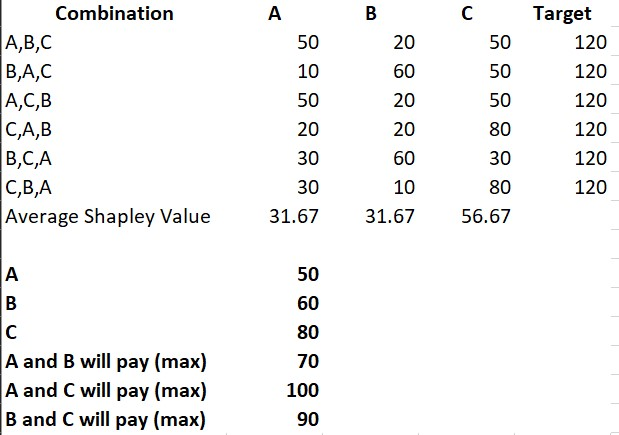

Using shap value as feature importance, becasue shap value meet this criterias.

Two properties that we think any good feature attribution method should follow:

1. Consistency. Whenever we change a model such that it relies more on a feature, then the attributed importance for that feature should not decrease.
2. Accuracy. The sum of all the feature importances should sum up to the total importance of the model. (For example if importance is measured by the R² value then the attribution to each feature should sum to the R² of the full model)

> If consistency fails to hold, then we can’t compare the attributed feature importances between any two models, because then having a higher assigned attribution doesn’t mean the model actually relies more on that feature.

> If accuracy fails to hold then we don’t know how the attributions of each feature combine to represent the output of the whole model. We can’t just normalize the attributions after the method is done since this might break the consistency of the method.

Source [Link](https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27)

In [129]:
#explainer = shap.Explainer(best_model)

atau

In [130]:
explainer = shap.TreeExplainer(best_model)

In [131]:
shap_values = explainer.shap_values(X_test_arr)

## **A. Global Explainer**

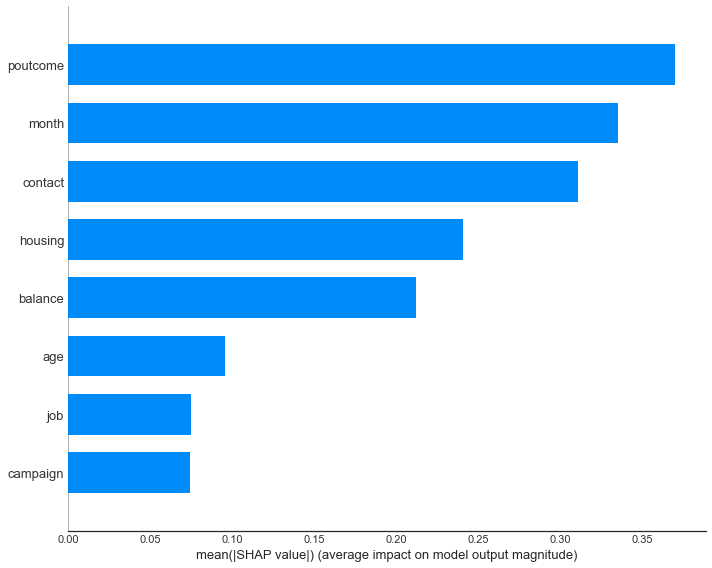

In [132]:
shap.summary_plot(shap_values[1], X_test_shap, plot_type = "bar", max_display=20, plot_size=(10,8))

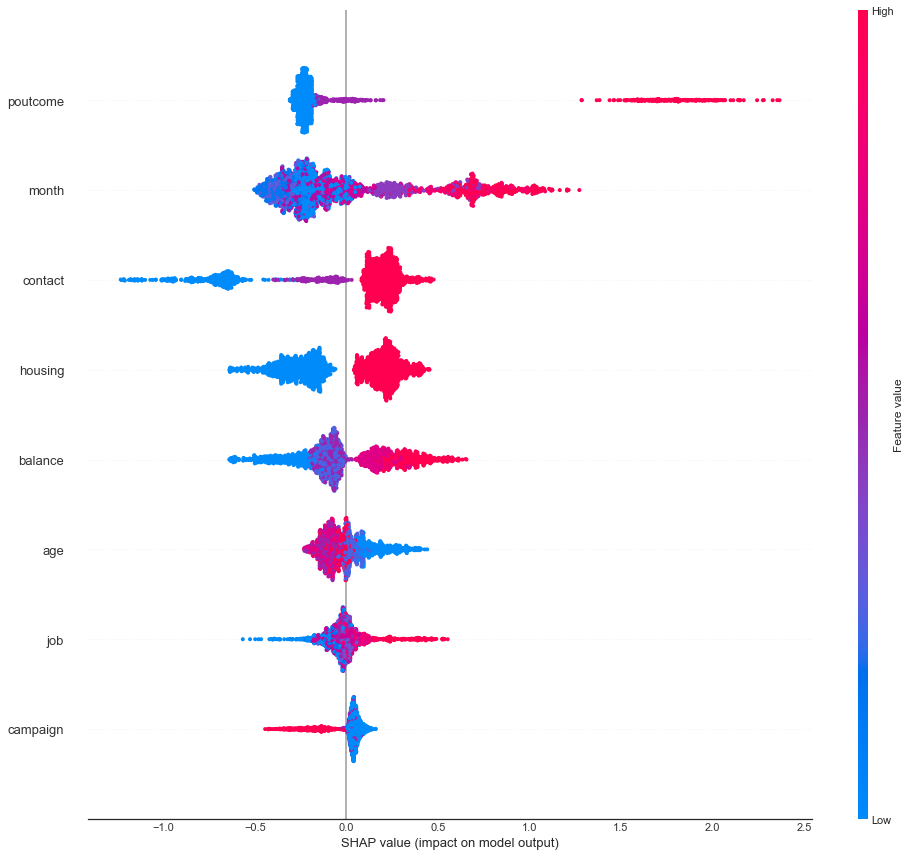

In [133]:
shap.summary_plot(shap_values[1], 
                  features=X_test_shap.values,
                  feature_names=X_test_shap.columns,
                 max_display=20,
                 plot_size=(14,12))

In [134]:
eq_freq_disc.binner_dict_

{'age': [-inf, 31.0, 36.0, 42.0, 52.0, inf],
 'balance': [-inf, 67.0, 342.0, 860.4000000000005, 2157.2, inf],
 'campaign': [-inf, 2.0, 3.0, inf],
 'pdays': [-inf, 95.0, inf]}

In [135]:
ordinal_enc.encoder_dict_

{'job': {'blue-collar': 0,
  'services': 1,
  'technician': 2,
  'admin': 3,
  'management': 4,
  'Rare': 5,
  'retired': 6},
 'housing': {'yes': 0, 'no': 1},
 'loan': {'yes': 0, 'no': 1},
 'contact': {'unknown': 0, 'telephone': 1, 'cellular': 2},
 'month': {'may': 0,
  'jul': 1,
  'nov': 2,
  'jun': 3,
  'aug': 4,
  'feb': 5,
  'apr': 6,
  'Rare': 7},
 'poutcome': {'unknown': 0, 'failure': 1, 'success': 2}}

From Global Explainer, top 5 predictive features are:
* poutcome (outcome of the previous marketing campaign): customers who failure in subscribe from previous campaign are unlikely to subscribe
* month (last contact month of year): customers who contacted in Q1 or December are likely to subscribe 
* contact (contact communication type): customers who have or contacted by cellphone are likely to subscribe
* housing (has housing loan?): customers who do not have housing loan are likely to subscribe
* balance (balance of the individua): customers who have high balance are likely to subscribe

## **B. Local Explainer**

### **Why Not Subscribe (0)?**

In [136]:
prediction_df_test[(prediction_df_test['GOOD_FLAG'] == 0) & (prediction_df_test['PRED_OPT_GOOD'] == 0)].head()

,job,month,balance,contact,housing,poutcome,campaign,age,GOOD_FLAG,PRED_OPT_GOOD,PRED_PROBA_GOOD
0,4,3,1,0,1,0,1,1,0,0,0.276753
1,2,0,1,0,0,0,2,1,0,0,0.181616
2,5,0,1,0,0,0,2,1,0,0,0.186138
7,0,0,0,2,0,0,1,0,0,0,0.431204
11,5,3,3,0,0,0,0,1,0,0,0.314020


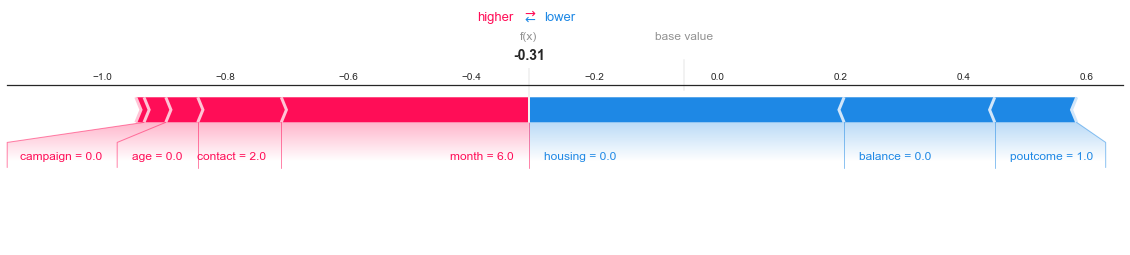

In [137]:
shap.initjs()
shap.force_plot(base_value = explainer.expected_value[1], # Base probability training prediction (index 1 untuk titik acuan agar konsisten, kekanan(1), kekiri (0))
                shap_values = shap_values[1][17], # shap value untuk feature di baris 2
                features = X_test_shap.values[17], #nilai feature di baris 2
                feature_names=X_test_shap.columns,
                matplotlib=True
)

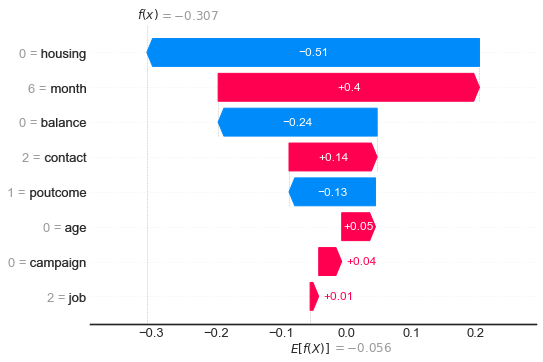

In [138]:
# same as above
shap.waterfall_plot(shap.Explanation(base_values=explainer.expected_value[1], # Base probability training prediction (index 1 untuk titik acuan agar konsisten, kekanan(1), kekiri (0))
                                     values=shap_values[1][17], # shap value untuk feature di baris 2
                                     data=X_test_shap.values[17], #nilai feature di baris 2
                                     feature_names=X_test_shap.columns))

Why subscribe?
>* Have housing loan (0)
>* Low balance (0)
>* Fail to subs in previous marketing campaign (1)

### **Why Subscribe (1)?**

In [139]:
prediction_df_test[(prediction_df_test['GOOD_FLAG'] == 1) & (prediction_df_test['PRED_OPT_GOOD'] == 1)].head()

,job,month,balance,contact,housing,poutcome,campaign,age,GOOD_FLAG,PRED_OPT_GOOD,PRED_PROBA_GOOD
3,2,3,4,2,1,0,0,0,1,1,0.862426
5,6,7,2,2,1,2,0,4,1,1,0.937265
6,6,6,4,1,1,0,0,4,1,1,0.818484
10,6,7,1,2,1,0,1,4,1,1,0.766320
13,6,2,4,2,1,1,0,4,1,1,0.716322


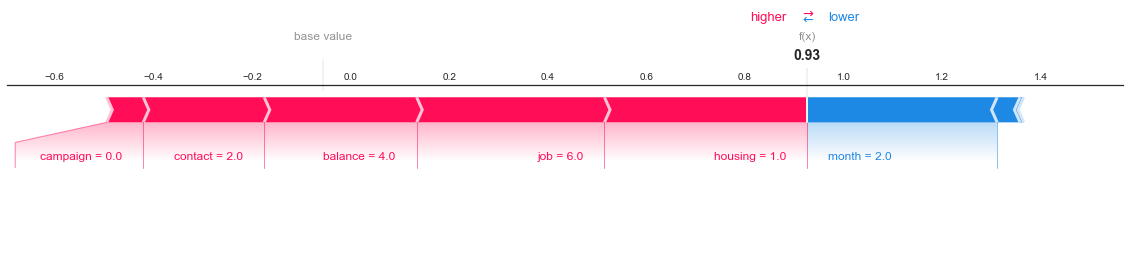

In [140]:
shap.initjs()
shap.force_plot(base_value = explainer.expected_value[1], # Base probability training prediction (index 1 untuk titik acuan agar konsisten, kekanan(1), kekiri (0))
                shap_values = shap_values[1][13], # shap value untuk feature di baris 84
                features = X_test_shap.values[13], #nilai feature di baris 84
                feature_names=X_test_shap.columns,
                matplotlib=True #show=False
)#.savefig('/content/drive/MyDrive/AI_and_Embedded_Systems/AI/References/02_Machine_Learning/00_Supervised_Model/04_Tree_Based_Model/00_XGBoost/shap_why_npl_1.png')

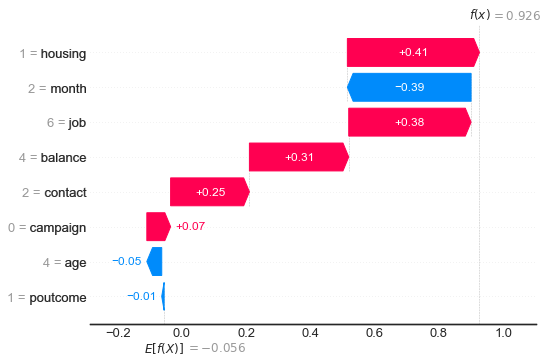

In [141]:
# same as above
shap.waterfall_plot(shap.Explanation(base_values=explainer.expected_value[1], # Base probability training prediction (index 1 untuk titik acuan agar konsisten, kekanan(1), kekiri (0))
                                     values=shap_values[1][13], # shap value untuk feature di baris 84
                                     data=X_test_shap.values[13], #nilai feature di baris 84
                                     feature_names=X_test_shap.columns))

Why subscribe?
>* Not have housing loan (1)
>* High balance (4)
>* Contacted below 2 times during campaign (0)

## **C. Predictive Features for the Model**

* Event = Subscribe
* Non-event = Not Subscribe

### **poutcome**

outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

,Total,Non-event,Non-event Distribution,Cum. Non-event Distribution,Event,Event Distribution,Cum. Event Distribution,Event Rate,WoE,IV
poutcome,,,,,,,,,,
0,1851,1080,0.882353,0.882353,771,0.688393,0.688393,0.416532,0.248232,0.048147
1,260,130,0.106209,0.988562,130,0.116071,0.804464,0.500000,-0.088795,0.000876
2,233,14,0.011438,1.000000,219,0.195536,1.000000,0.939914,-2.838810,0.522619


Total IV: 0.5716415858006245



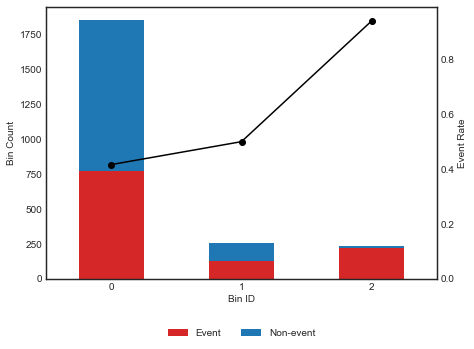

In [142]:
# Event = Subscribe
stacked_dual_axis_barplot_iv_binary(prediction_df_test, 'poutcome', 'GOOD_FLAG')

* Unknown / No Feedback: 0
* Failure: 1
* Success: 2 

Customers who not subscribe (Failure) during previous campaign unlikely to subscribe

### **housing**

has housing loan? (categorical: 'no','yes','unknown')

,Total,Non-event,Non-event Distribution,Cum. Non-event Distribution,Event,Event Distribution,Cum. Event Distribution,Event Rate,WoE,IV
housing,,,,,,,,,,
0,1098,694,0.566993,0.566993,404,0.360714,0.360714,0.367942,0.452262,0.093292
1,1246,530,0.433007,1.000000,716,0.639286,1.000000,0.574639,-0.389599,0.080366


Total IV: 0.17365823919324672



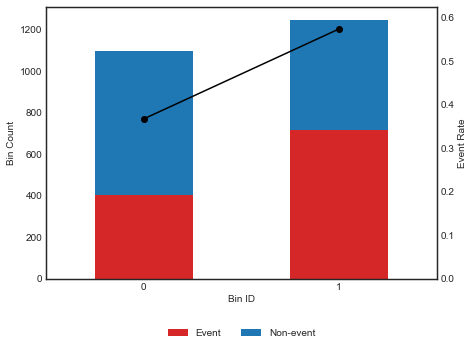

In [143]:
# Event = Subscribe
stacked_dual_axis_barplot_iv_binary(prediction_df_test, 'housing', 'GOOD_FLAG')

* Have housing loan: 0
* Do not have housing loan: 1

Customers who do not have housing loans tend to subscribe

### **balance**

Balance of the individual

,Total,Non-event,Non-event Distribution,Cum. Non-event Distribution,Event,Event Distribution,Cum. Event Distribution,Event Rate,WoE,IV
balance,,,,,,,,,,
0,473,309,0.252451,0.252451,164,0.146429,0.146429,0.346723,0.544679,0.057748
1,486,272,0.222222,0.474673,214,0.191071,0.337500,0.440329,0.151031,0.004705
2,457,239,0.195261,0.669935,218,0.194643,0.532143,0.477024,0.003173,0.000002
3,448,216,0.176471,0.846405,232,0.207143,0.739286,0.517857,-0.160254,0.004915
4,480,188,0.153595,1.000000,292,0.260714,1.000000,0.608333,-0.529107,0.056678


Total IV: 0.1240479903065994



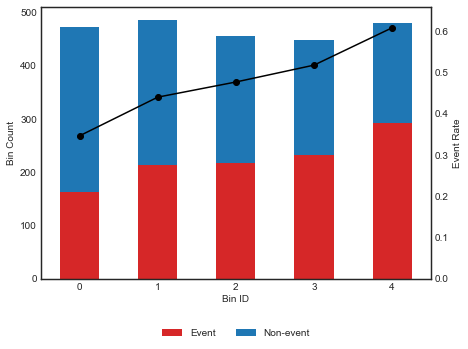

In [144]:
# Event = Subscribe
stacked_dual_axis_barplot_iv_binary(prediction_df_test, 'balance', 'GOOD_FLAG')

* balance < 67: 0
* 67-342: 1
* 342 - 860: 2
* 860-2157: 3
* balance > 2157: 4

Customers who have a balance more than 67 EUR likely to subscribe. If want more strict the company can target the campaign for customers who have balance more than 860 EUR.

### **month**

last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

,Total,Non-event,Non-event Distribution,Cum. Non-event Distribution,Event,Event Distribution,Cum. Event Distribution,Event Rate,WoE,IV
month,,,,,,,,,,
0,608,415,0.339052,0.339052,193,0.172321,0.172321,0.317434,0.676793,0.112842
1,311,173,0.141340,0.480392,138,0.123214,0.295536,0.443730,0.137242,0.002488
2,201,109,0.089052,0.569444,92,0.082143,0.377679,0.457711,0.080764,0.000558
3,249,133,0.108660,0.678105,116,0.103571,0.481250,0.465863,0.047963,0.000244
4,328,180,0.147059,0.825163,148,0.132143,0.613393,0.451220,0.106949,0.001595
5,163,69,0.056373,0.881536,94,0.083929,0.697321,0.576687,-0.397984,0.010967
6,193,70,0.057190,0.938725,123,0.109821,0.807143,0.637306,-0.652485,0.034341
7,291,75,0.061275,1.000000,216,0.192857,1.000000,0.742268,-1.146586,0.150871


Total IV: 0.3139063248309464



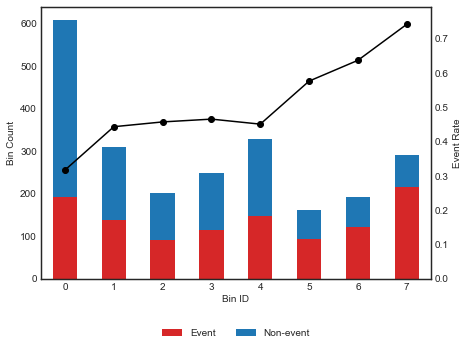

In [145]:
# Event = Subscribe
stacked_dual_axis_barplot_iv_binary(prediction_df_test, 'month', 'GOOD_FLAG')

* Mei: 0
* Juli: 1
* November: 2
* Juni: 3
* Agustus: 4
* Februari: 5
* April: 6
* Januari, Maret, September, Oktober, Desember: 7

Customers who are contacted during Q1 and December likely to subscribe

### **contact**

contact communication type (categorical: 'cellular','telephone','unknown')

,Total,Non-event,Non-event Distribution,Cum. Non-event Distribution,Event,Event Distribution,Cum. Event Distribution,Event Rate,WoE,IV
contact,,,,,,,,,,
0,472,378,0.308824,0.308824,94,0.083929,0.083929,0.199153,1.302804,0.292994
1,172,91,0.074346,0.383170,81,0.072321,0.156250,0.470930,0.027615,0.000056
2,1700,755,0.616830,1.000000,945,0.843750,1.000000,0.555882,-0.313263,0.071086


Total IV: 0.3641354972560815



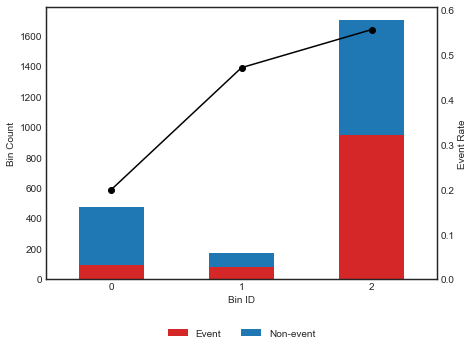

In [146]:
# Event = Subscribe
stacked_dual_axis_barplot_iv_binary(prediction_df_test, 'contact', 'GOOD_FLAG')

* Other: 0
* Telephone: 1
* Cellphone: 2

Customers who are contacted via cellphone or have a cellphone likely to subscribe

### **age**

,Total,Non-event,Non-event Distribution,Cum. Non-event Distribution,Event,Event Distribution,Cum. Event Distribution,Event Rate,WoE,IV
age,,,,,,,,,,
0,509,227,0.185458,0.185458,282,0.251786,0.251786,0.554028,-0.305753,0.020280
1,492,280,0.228758,0.414216,212,0.189286,0.441071,0.430894,0.189408,0.007476
2,430,255,0.208333,0.622549,175,0.156250,0.597321,0.406977,0.287682,0.014983
3,479,283,0.231209,0.853758,196,0.175000,0.772321,0.409186,0.278537,0.015656
4,434,179,0.146242,1.000000,255,0.227679,1.000000,0.587558,-0.442673,0.036050


Total IV: 0.09444602870789742



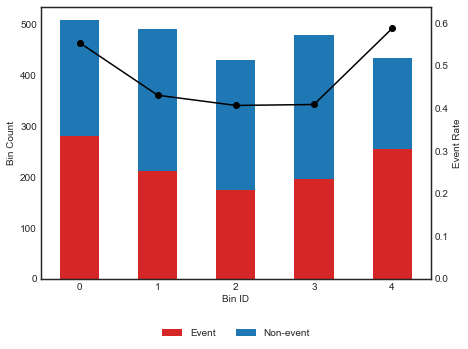

In [147]:
# Event = Subscribe
stacked_dual_axis_barplot_iv_binary(prediction_df_test, 'age', 'GOOD_FLAG')

* age < 31: 0
* 31-36: 1
* 36-42: 2
* 42-52: 3
* age > 52: 4

Customers who are below 31 and above 52 likely to subscribe

### **job**

type of job

,Total,Non-event,Non-event Distribution,Cum. Non-event Distribution,Event,Event Distribution,Cum. Event Distribution,Event Rate,WoE,IV
job,,,,,,,,,,
0,404,254,0.207516,0.207516,150,0.133929,0.133929,0.371287,0.437903,3.222434e-02
1,194,120,0.098039,0.305556,74,0.066071,0.200000,0.381443,0.394631,1.261548e-02
2,389,217,0.177288,0.482843,172,0.153571,0.353571,0.442159,0.143607,3.405815e-03
3,297,155,0.126634,0.609477,142,0.126786,0.480357,0.478114,-0.001197,1.816843e-07
4,564,270,0.220588,0.830065,294,0.262500,0.742857,0.521277,-0.173953,7.290690e-03
5,343,157,0.128268,0.958333,186,0.166071,0.908929,0.542274,-0.258296,9.764495e-03
6,153,51,0.041667,1.000000,102,0.091071,1.000000,0.666667,-0.781943,3.863169e-02


Total IV: 0.1039326973144387



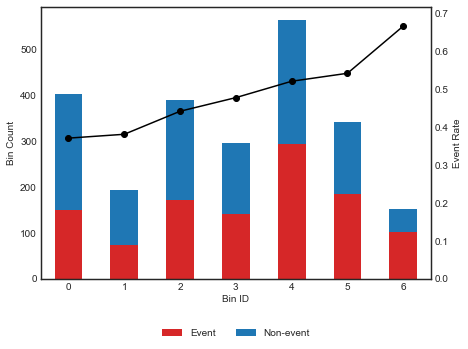

In [148]:
# Event = Subscribe
stacked_dual_axis_barplot_iv_binary(prediction_df_test, 'job', 'GOOD_FLAG')

* blue-collar: 0
* services: 1
* technician: 2
* admin: 3
* management: 4
* Other: 5
* retired': 6

Customers who are works as blue-collar and services unlikely to subscribe

### **campaign**

number of contacts performed during this campaign and for this client (numeric, includes last contact)

,Total,Non-event,Non-event Distribution,Cum. Non-event Distribution,Event,Event Distribution,Cum. Event Distribution,Event Rate,WoE,IV
campaign,,,,,,,,,,
0,1650,797,0.651144,0.651144,853,0.761607,0.761607,0.516970,-0.156700,0.017310
1,262,146,0.119281,0.770425,116,0.103571,0.865179,0.442748,0.141221,0.002219
2,432,281,0.229575,1.000000,151,0.134821,1.000000,0.349537,0.532279,0.050435


Total IV: 0.06996362947268102



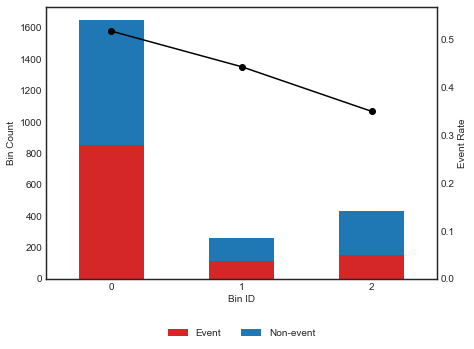

In [149]:
# Event = Subscribe
stacked_dual_axis_barplot_iv_binary(prediction_df_test, 'campaign', 'GOOD_FLAG')

* campaign < 2: 0
* 2-3: 1
* campaign > 3: 2

Customers who are conctacted during campaign below 3 times likely to subscribe

# **06. Conclusion and Recommendation**

**Conclusion:**

* The LGBM model successfully classifies customers who are subscribed and non-subscribed and **not overfit**
    * **Train** ROC-AUC 79%
    * **Test** ROC-AUC 77%

* Model has **potential to lose 33% potential customers**, but model can **filter less potential customers** to subscribe up to **74%** (Specificity)

* Models can **reduce campaign costs** from **220366 EUR** to **99734 EUR**. In other words, **campaign costs reduced** by **54.7%** with **70% precision** to **predict** potential customers **correctly**.

* Successful model **increased subscribe rate** from **48%** (random calls) to **70%**

* There are 5 variables that **affect** customers to **subscribe**
    * Previous Campaign Outcomes
    * Campaign Month
    * ContactType
    * Housing Loans
    * Account Balances

**Recommendation:**

* **Adding more features** such as the interest rate offered, the form of promotion, income or level of education

* **Do a campaign** in **Q1 or in December** because it has a **high subscribe rate** and **avoid the campaign in May**

* **Target** customers **aged under 31** and **over 52** years **personally**

* **Avoid** customers who **didn't subscribe to the previous campaign** and **don't contact** the same person **more than 2 times** because it will **indicate spam**

* **Focus the campaign** on customers with an **account balance of more than 67 EUR** or if you want to be **stricter**, you can do it on customers with an **account balance of more than 860 EUR**